This project is carried out by Mikhail Voronin, my contacts are below: \
**e-mail**: mvoroning@gmail.com \
**telegram**: mvoroning \

link to dataset: https://www.kaggle.com/datasets/carrie1/ecommerce-data/data

>[Task](#scrollTo=KPGSCpwBAbpk)

>[About dataset](#scrollTo=ag5WZfiryWGR)

>[Dataset contents](#scrollTo=3xnUtVGFGkK2)

>[Analysis](#scrollTo=UbFjUM7n1qUY)

>>[Data preparation](#scrollTo=FpKK_CTf9qGA)

>>[Variables exploration](#scrollTo=zubsxWa0xW8z)

>>[Natural Frequency determination](#scrollTo=SqU3fMYkBKZa)

>>>[Histogram of unique purchases](#scrollTo=tIiTDPyN8ROj)

>>>[Bar chart of the frequency of purchases](#scrollTo=zzT0KN-O80YE)

>>>[Splitting customers by Use Cases](#scrollTo=yBnq5AMz9CX4)

>>[Customer Retention Analysis](#scrollTo=NU4DxFQnFEJP)

>>>[Retention analysis of customers with monthly natural frequency of purchasing](#scrollTo=GNXXU6nrwB4L)

>>>>[Lifecycle bar chart](#scrollTo=RKcFDd-elEiD)

>>>>[Quick Ratio metric](#scrollTo=kAj2e7cGeMwl)

>>>>[Retention Rate and Time-To-Habit](#scrollTo=J8KjHAV6SaVY)

>>>>[Shifting and Slope](#scrollTo=jP_PM4u8dgDz)

>>>>[Outliers](#scrollTo=fYvvRnX5d75G)

>>>[Retention analysis of customers with quarterly natural frequency of purchasing](#scrollTo=5BUSVn2Vx2V3)

>>>>[Lifecycle bar chart](#scrollTo=mVOHckq37Q2f)

>>>>[Quick Ratio metric](#scrollTo=qiyFC4gfr3wZ)

>>>>[Retention Rate and Time-To-Habit](#scrollTo=EPhs9AaNF7SC)

>>>>[Shifting and Slope](#scrollTo=AoFUVd0breKo)

>>>>[Outliers](#scrollTo=Y6NB1ysZreKo)

>>[Revenue Analysis](#scrollTo=mncvxQjnFKFE)

>>>[General Revenue Analysis](#scrollTo=SjX7cFrlFOeg)

>>>[Repeat Revenue analysis by customers with monthly natural frequency of purchasing](#scrollTo=eQP2wvLAUkUW)

>>>>[Revenue Retention](#scrollTo=Z8u0mY78XSdW)

>>>>[Average Revenue Per Customer](#scrollTo=hs8jQVYynlEk)

>>>[Repeat Revenue analysis by customers with quarterly natural frequency of purchasing](#scrollTo=_QFXWHSzIjgZ)

>>>>[Revenue Retention](#scrollTo=YezFroeeMeBu)

>>>>[Average Revenue Per Customer](#scrollTo=whP7V14rMmU9)

>[Conclusions](#scrollTo=WYtv08mXWTtz)



---
# **Task**



The purpose of this study is to analyze customer retention and the revenue they generate. Using the available data, we will split customers by use cases of the product and analyze customer retention and revenue for each use case. We will take a look at how people use the product over time in the context of Users Lifecycle States. We will calculate such metrics as MAU, Quick Ratio, Retention Rate and Time-To-Habit. Also, We will determine which components affect revenue, analyze a revenue retention and calculate ARPC.

# **About dataset**

This is a transnational dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **Dataset contents**

1. **InvoiceNo** &mdash; invoice number. Unique for each transaction. If the number starts with 'c', it means a cancellation invoice with unique number, i.e. C545569 doesn't mean a cancellation of the invoice 545569.
2. **StockCode** &mdash; stock product (item) number. A 5-digit integral number uniquely assigned to each distinct product. \
3. **Description**  &mdash; description of the purchased item. \
4. **Quantity** &mdash; quantity of purchased items per transaction. \
5. **InvoiceDate** &mdash; day and time when each transaction was generated. \
6. **UnitPrice** &mdash; product price per unit in £. \
7. **CustomerID** &mdash; unique customer identification number. \
8. **Country** &mdash; name of the country where each customer resides.

# **Analysis**

## **Data preparation**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

plt.style.use('seaborn-v0_8-darkgrid')
pd.options.mode.copy_on_write = True

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Let's download the dataset and look at its structure.

In [3]:
df = pd.read_csv(
    '/content/gdrive/MyDrive/Colab Notebooks/data.csv',
    encoding="ISO-8859-1"
    )
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Let's look at the data summary.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


There are 8 columns, 541909 entries in total, but there are a lot of missing values in "CustomerID" field. Also there are missing values in "Description" field.

There are about 25% of missing values in "CustomerID" field. Let's try to look at the indexes of missing values.

In [7]:
# looking for indexes of null values
nanidx_CustomerID = df[df.CustomerID.isnull()].index.tolist()

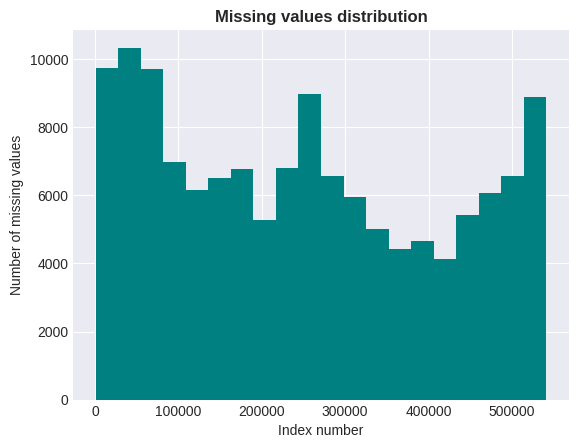

In [8]:
plt.hist(nanidx_CustomerID, bins=20, color='teal')
plt.xlabel('Index number')
plt.ylabel('Number of missing values')
plt.title('Missing values distribution', fontweight="bold")
plt.show()

We can conclude that the missing values are distributed quite evenly throughout the data set, rather than being completely absent from a specific point. \
Based on the available data, it is not possible to unambiguously identify which of the customers made the purchase. We need to remove this data in order to perform a correct analysis on the customers.

In [9]:
df.dropna(subset=['CustomerID'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


Now all the data is filled in and we can convert customerID field to integer.

In [10]:
df.CustomerID = df.CustomerID.astype('Int32')

Also convert InvoiceDate to datetime format.

In [11]:
df.InvoiceDate = pd.to_datetime(df['InvoiceDate'])

Let's see if there are duplicated rows in the dataframe and print them.

In [12]:
df[df.duplicated(keep=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom


We can notice that there are duplicates with full match across all columns like rows 494 and 517. It means that the certain customer buys one of the items with the same invoice number more than one time, it's not correct because in this case quantity should be increased. Taking this into account, we can drop duplicated rows.

In [13]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  Int32         
 7   Country      401604 non-null  object        
dtypes: Int32(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 26.4+ MB


Now we have totally 8 columns and 401604 rows with fully filled data and without duplicated rows.

For further analysis, we will group the data by invoice number. We will only keep the following fields: "InvoiceNo", "InvoiceDate", "Country", "CustomerID" aggregated sum of "Quantity" and aggregated mean of "UnitPrice". Also we will create a new column called "GMV" with the result of total sum of sale for each "InvoiceNo". We will also leave only a date part from the datetime column "InvoiceDate".

In [14]:
df_group = df.assign(GMV=df['Quantity']*df['UnitPrice']) \
              .groupby(by=['InvoiceNo', 'InvoiceDate', 'Country', 'CustomerID']) \
              .agg(
                    {
                  'Quantity': 'sum',
                  'UnitPrice': 'mean',
                  'GMV': 'sum'
                }
              ).reset_index()
df_group.rename(columns={'UnitPrice':'MeanUnitPrice'}, inplace=True)
df_group.InvoiceDate = pd.to_datetime(df_group.InvoiceDate.dt.date)
df_group.head()

,InvoiceNo,InvoiceDate,Country,CustomerID,Quantity,MeanUnitPrice,GMV
0,536365,2010-12-01,United Kingdom,17850,40,3.910000,139.12
1,536366,2010-12-01,United Kingdom,17850,12,1.850000,22.20
2,536367,2010-12-01,United Kingdom,13047,83,4.853333,278.73
3,536368,2010-12-01,United Kingdom,13047,15,4.775000,70.05
4,536369,2010-12-01,United Kingdom,13047,3,5.950000,17.85


Converting the InvoiceNo field to integer by creating the new column "CancellingInvoice" for indicating if the invoice is cancelling and by removing a "C" character.

In [15]:
df_group['CancellingInvoice'] = df_group.InvoiceNo.str.contains('C')
df_group['InvoiceNo'] = df_group['InvoiceNo'].str.replace('C', '').astype(int)

Make sure that the number of the canceling invoice is not linked to the direct invoice number. i.e. C545569 doesn't mean a cancellation of the invoice 545569.

In [16]:
df_group[df_group.InvoiceNo.duplicated(keep=False) & df_group.CancellingInvoice == True]

,InvoiceNo,InvoiceDate,Country,CustomerID,Quantity,MeanUnitPrice,GMV,CancellingInvoice
19371,545569,2011-03-03,United Kingdom,14239,-2,4.95,-9.9,True
19372,545569,2011-03-03,United Kingdom,14239,-4,10.35,-46.2,True


This is so because there are no lines in which the numbers of the direct and canceling invoice are duplicated. \
So we have the following dataset.

In [17]:
df_group.head()

,InvoiceNo,InvoiceDate,Country,CustomerID,Quantity,MeanUnitPrice,GMV,CancellingInvoice
0,536365,2010-12-01,United Kingdom,17850,40,3.910000,139.12,False
1,536366,2010-12-01,United Kingdom,17850,12,1.850000,22.20,False
2,536367,2010-12-01,United Kingdom,13047,83,4.853333,278.73,False
3,536368,2010-12-01,United Kingdom,13047,15,4.775000,70.05,False
4,536369,2010-12-01,United Kingdom,13047,3,5.950000,17.85,False


In [18]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22221 entries, 0 to 22220
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          22221 non-null  int64         
 1   InvoiceDate        22221 non-null  datetime64[ns]
 2   Country            22221 non-null  object        
 3   CustomerID         22221 non-null  Int32         
 4   Quantity           22221 non-null  int64         
 5   MeanUnitPrice      22221 non-null  float64       
 6   GMV                22221 non-null  float64       
 7   CancellingInvoice  22221 non-null  bool          
dtypes: Int32(1), bool(1), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.1+ MB


## **Variables exploration**

Let's look at the variables separately to better understand the data we will be working with.

**1. InvoiceNo / CancellingInvoice** \
As we have notice, "InvoiceNo" field had object type, not integer. It was because there are also cancelled invoices that start with "C" letter. Let's look how many invoices in dataset are cancelling invoices.

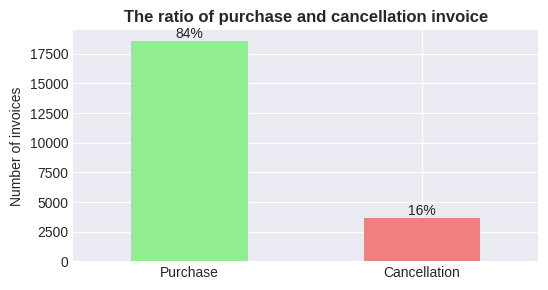

In [19]:
fig = plt.figure(figsize=(6,3))
counts = df_group['CancellingInvoice'].value_counts()

ax = counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])

plt.title('The ratio of purchase and cancellation invoice', fontweight="bold")
plt.xlabel('')
plt.ylabel('Number of invoices')
plt.xticks(rotation=0)
ax.set_xticklabels(['Purchase', 'Cancellation'], rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2,
            i.get_height() + 1,
            f'{(i.get_height() / counts.sum())*100:.0f}%',
            ha='center', va='bottom')

plt.show()

As we can see, among 22221 unique invoices, 84% are purchase invoices, 16% are cancellation invoices. At least we can say that customers make more purchasing transactions than cancellation ones.

**2. InvoiceDate** \
Let's find out what date range is in the dataset.

In [20]:
print(
    'first invoice date: ', df_group.InvoiceDate.min().date(), '\n'
    'last invoice date: ', df_group.InvoiceDate.max().date(), '\n'
    'date_range: ', (df_group.InvoiceDate.max().date() - df_group.InvoiceDate.min().date()).days , 'days'
    )

first invoice date:  2010-12-01 
last invoice date:  2011-12-09 
date_range:  373 days


The date range is 373 days between the first and last day in dataset.

**3. Country** \
Let's see which countries customers are shopping in.

In [21]:
pd.DataFrame(round(df_group.Country.value_counts(normalize=True) * 100, 2)).T

Country,United Kingdom,Germany,France,EIRE,Belgium,Spain,Netherlands,Switzerland,Portugal,Australia,...,Israel,European Community,Czech Republic,Lithuania,United Arab Emirates,Saudi Arabia,Bahrain,Brazil,Lebanon,RSA
proportion,89.49,2.71,2.07,1.44,0.54,0.47,0.45,0.32,0.32,0.31,...,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.0,0.0,0.0


In [22]:
print('Amount of unique countries: ', df_group.Country.value_counts().count())

Amount of unique countries:  37


As we can see, most of the orders were made by residents of the UK (~89%). But there are customers from 37 countries in total.

**4. CustomerID** \

Let's find out how many unique customers in dataset.

In [23]:
print('Number of unique customers: ', df_group.CustomerID.nunique())

Number of unique customers:  4372


There are 4372 unique customers in dataset. Let's find out how many of them have made a cancellation.

In [24]:
print('Number of unique customers that made a cancellations: ', df_group[df_group['CancellingInvoice'] == True].CustomerID.nunique())

Number of unique customers that made a cancellations:  1589


There are 1589 customers that have made at least one cancellation. Let's find out how many customers made a purchase.

In [25]:
print('Number of unique customers that made a purchase: ', df_group[df_group['CancellingInvoice'] == False].CustomerID.nunique())

Number of unique customers that made a purchase:  4339


We see that the number of unique customers that made a purchase isn't equal to the number of all unique customers in dataset. So it means that there are 33 customers, who has only cancellation invoices in the period under review. Let's calculate how many orders each user makes on average.

In [26]:
print(
    'Average purchasing orders per customer: ',
    "{0:.2f}".format(
        df_group[df_group['CancellingInvoice'] == False].shape[0] / df_group[df_group['CancellingInvoice'] == False].CustomerID.nunique()
        )
    )

Average purchasing orders per customer:  4.28


On average, each customer made ~4 purchases during the entire period.

**5. Quantity** \
Let's see how the data is distributed by the number of items in the order.

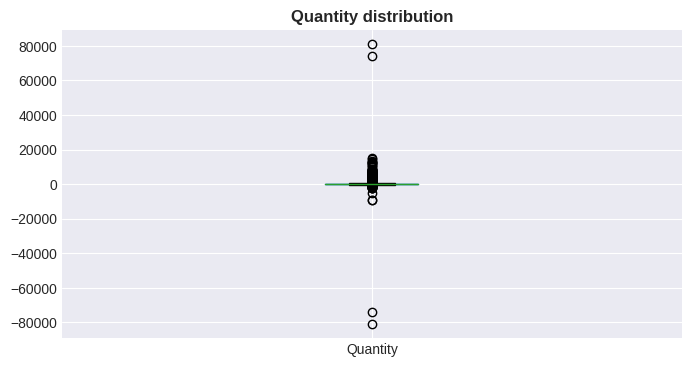

In [27]:
fig = plt.figure(figsize=(8,4))
df_group.boxplot(column='Quantity')
plt.title('Quantity distribution', fontweight="bold")
plt.show()

If the quantity is positive, it means that the customer is purchasing goods, if negative, customer is returnin them back. We can notice that there are a lot of outliers, both positive and negative. This means that some customers order large quantities of goods but also return. Also we can notice that there are big symmetric outliers with values around +-80000. Looking at the boxplot we can't evaluate descriptive statistics, so let's take a closer look in the table.

In [28]:
pd.DataFrame(df_group.Quantity.describe())

,Quantity
count,22221.000000
mean,220.190405
std,1168.679947
min,-80995.000000
25%,30.000000
50%,120.000000
75%,252.000000
max,80995.000000


The median value equals to 120 and it is positive, it means that customers buy more goods than they return back. The median value is not similar to the mean value because there are a lot of outliers in data and the distribution is probably not normal. \
Let's explore big outliers.

In [29]:
df_group[abs(df_group.Quantity) > 20000]

,InvoiceNo,InvoiceDate,Country,CustomerID,Quantity,MeanUnitPrice,GMV,CancellingInvoice
1911,541431,2011-01-18,United Kingdom,12346,74215,1.04,77183.6,False
18533,581483,2011-12-09,United Kingdom,16446,80995,2.08,168469.6,False
18988,541433,2011-01-18,United Kingdom,12346,-74215,1.04,-77183.6,True
22216,581484,2011-12-09,United Kingdom,16446,-80995,2.08,-168469.6,True


We see that in these cases 2 customers made an order and almost immediately canceled it. Perhaps they made these orders by mistake.

**6. MeanUnitPrice** \

Let's see how the data is distributed by the mean unit price in the order.

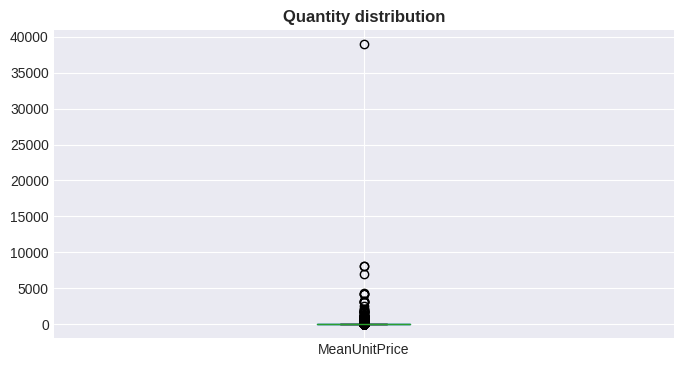

In [30]:
fig = plt.figure(figsize=(8,4))
df_group.boxplot(column='MeanUnitPrice')
plt.title('Quantity distribution', fontweight="bold")
plt.show()

Here we see that there are also outliers &mdash; orders with large price of the item. And there is also one transaction where unit price is near 40000. Let's check out occasions with large unit price.

In [31]:
df_group[df_group.MeanUnitPrice > 3000]

,InvoiceNo,InvoiceDate,Country,CustomerID,Quantity,MeanUnitPrice,GMV,CancellingInvoice
5941,551697,2011-05-03,United Kingdom,16029,1,8142.75,8142.75,False
13289,569382,2011-10-03,United Kingdom,15502,1,3155.95,3155.95,False
14320,571751,2011-10-19,Singapore,12744,2,3034.03,6068.06,False
14852,573077,2011-10-27,France,12536,1,4161.06,4161.06,False
14854,573080,2011-10-27,France,12536,1,4161.06,4161.06,False
19879,551685,2011-05-03,United Kingdom,16029,-1,8142.75,-8142.75,True
19880,551699,2011-05-03,United Kingdom,16029,-1,6930.00,-6930.00,True
20268,556445,2011-06-10,United Kingdom,15098,-1,38970.00,-38970.00,True
20598,560372,2011-07-18,United Kingdom,17448,-1,4287.63,-4287.63,True
20632,560647,2011-07-20,United Kingdom,18102,-1,3060.60,-3060.60,True


As we can see, there are lots of invoices with a high cost of goods that have been cancelled. Because of this, it is possible that revenue for the period will decrease. Let's check the median value of mean unit price per transaction.

In [32]:
print(f'Median value of mean unit price per transaction is {df_group.MeanUnitPrice.median():.2f}')

Median value of mean unit price per transaction is 2.88


So, 50% of mean unit price per invoice are less then 2.88 and 50% are more than 2.88. It means that most of the goods are not that expensive.

We will not consider gross turnover separately, as it directly depends on the number of goods sold as "Quantity" and the average price of the item as "MeanUnitPrice".

## **Natural Frequency determination**

In this section we will determine the natural frequency of using our online retail service. After determining the frequency, we will be able to understand the period for cohorts. \
We will assume that the user is active in the period, if he makes a purchase, so **the core action is "purchase one or more items"**. We understand that most of our customers are wholesalers who buy large quantities of goods at once and don't purchase again until they have sold their inventory. Considering this, **my hypothesis is that the natural frequency is daily.** \
To verify this, let's build a histogram of unique purchases per day for November 2011. Here it is important for us to consider users who have been using our service for a long time, i.e. they made their first purchase before November. This is important because we want to understand how often the product is used by those users who have already developed a habit and use the product with the regularity that is convenient for them.

*To carry out further analysis, we will assume that the first recorded order from a user corresponds to their initial order on our platform, meaning that they did not previously order from us. Considering this, we will exclude from consideration those buyers who have only made cancellations.*

In [33]:
# Determining the first purchasing day for each customer who has not only cancellation invoices
first_invoice_date = df_group[df_group.CancellingInvoice==False].groupby('CustomerID')['InvoiceDate'].min().reset_index()

# Merging existing data with the first purchasing day, setting NaNs for those who have only cancellation invoices
df_group = df_group.merge(first_invoice_date, how='left', on='CustomerID', suffixes=('', 'First'))

# We only leave those customers who has not only cancel invoices
df_group = df_group[df_group['InvoiceDateFirst'].notna()].reset_index(drop=True)

Now we have data on the day of the first order for each customer. We have recorded this information in the "InvoiceDateFirst" column. There are also customers who have made several invoice cancellations before making a purchase. Considering that we are trying to simplify things and we believe that users may be using our platform for the first time, we assume that it is more likely that you will need to purchase something before returning something. Therefore, we will remove records where invoice cancellations occur before purchase invoices.

In [34]:
df_group = df_group[df_group['InvoiceDate'] >= df_group['InvoiceDateFirst']]
df_group.head() # print first 5 rows of the resulting dataframe

,InvoiceNo,InvoiceDate,Country,CustomerID,Quantity,MeanUnitPrice,GMV,CancellingInvoice,InvoiceDateFirst
0,536365,2010-12-01,United Kingdom,17850,40,3.910000,139.12,False,2010-12-01
1,536366,2010-12-01,United Kingdom,17850,12,1.850000,22.20,False,2010-12-01
2,536367,2010-12-01,United Kingdom,13047,83,4.853333,278.73,False,2010-12-01
3,536368,2010-12-01,United Kingdom,13047,15,4.775000,70.05,False,2010-12-01
4,536369,2010-12-01,United Kingdom,13047,3,5.950000,17.85,False,2010-12-01


### **Histogram of unique purchases**

We will create the new dataframe by selecting customers who made the purchase in November 2011 and have already made a purchase at least once before November. Among the buyers, we leave only those who have an invoice for the purchase, not cancelling invoice, because it is important for us that the buyer makes the purchase according the core action.

In [35]:
df_nov_cust_purchases = df_group[
    (df_group.InvoiceDate.dt.strftime('%m') == '11') & (df_group.InvoiceDateFirst < '2011-11-01') & (df_group.CancellingInvoice == False)
    ][
        ['InvoiceNo', 'InvoiceDate', 'CustomerID', 'CancellingInvoice']
        ]
df_nov_cust_purchases.head(3) # print first 3 rows of the resulting dataframe

,InvoiceNo,InvoiceDate,CustomerID,CancellingInvoice
15128,573744,2011-11-01,17733,False
15129,573745,2011-11-01,17419,False
15130,573746,2011-11-01,13461,False


Let's create the new column called "DayInNovember" by extracting a day in November from the transaction date.

In [36]:
df_nov_cust_purchases['DayInNovember'] = df_nov_cust_purchases.InvoiceDate.dt.strftime('%d').astype(int)
df_nov_cust_purchases.sample(3).sort_values('DayInNovember')

,InvoiceNo,InvoiceDate,CustomerID,CancellingInvoice,DayInNovember
16515,576891,2011-11-16,12662,False,16
17055,578068,2011-11-22,14505,False,22
17263,578509,2011-11-24,12705,False,24


Determining the number of active days for each customer based on the number of purchase days. A user is active if he makes a purchase.

In [37]:
df_purchasing_freq = df_nov_cust_purchases.groupby('CustomerID')['DayInNovember'].nunique().reset_index()
df_purchasing_freq.rename(columns={'DayInNovember':'AmountPurchasingDays'}, inplace=True)
df_purchasing_freq.sample(5)

,CustomerID,AmountPurchasingDays
473,14390,3
647,15110,1
309,13629,2
455,14290,1
35,12483,1


So, let's plot the histogram for the distribution of the number of active days.

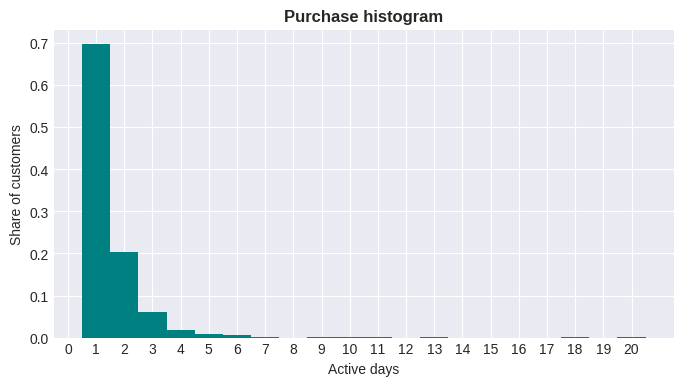

In [38]:
fig = plt.figure(figsize=(8,4))
plt.hist(df_purchasing_freq.AmountPurchasingDays, bins=np.arange(21)+0.5, density=True, color='teal')
plt.xlabel('Active days')
plt.ylabel('Share of customers')
plt.xticks(ticks=np.arange(21))
plt.title('Purchase histogram', fontweight="bold")
plt.show()

Looking at this histogram, we can say that most customers make a purchase only once a month. This means that the hypothesis is confirmed, and the natural frequency of using our online retail service is monthly. \
To further verify this, let's plot a bar chart of the frequency of purchases.

### **Bar chart of the frequency of purchases**

Let's create a chart similar to the one we created before, but this time we will use the frequency of visits between active days instead of the number of active days. To do this, we need to calculate the average difference between the dates of visits for each customer. We will then divide these results into categories for easier analysis.

In [39]:
# Print dataframe to remember what it looks like so that we can extract the necessary information from it
df_group[df_group.CancellingInvoice == False].head()

,InvoiceNo,InvoiceDate,Country,CustomerID,Quantity,MeanUnitPrice,GMV,CancellingInvoice,InvoiceDateFirst
0,536365,2010-12-01,United Kingdom,17850,40,3.910000,139.12,False,2010-12-01
1,536366,2010-12-01,United Kingdom,17850,12,1.850000,22.20,False,2010-12-01
2,536367,2010-12-01,United Kingdom,13047,83,4.853333,278.73,False,2010-12-01
3,536368,2010-12-01,United Kingdom,13047,15,4.775000,70.05,False,2010-12-01
4,536369,2010-12-01,United Kingdom,13047,3,5.950000,17.85,False,2010-12-01


Let's create a new DataFrame by selecting the necessary columns and adding a new column called "DaysDifference". This column will contain the difference in days between the current transaction and the previous one for each customer.

In [40]:
df_diff = df_group[df_group.CancellingInvoice == False][['InvoiceNo', 'InvoiceDate', 'CustomerID', 'InvoiceDateFirst', 'Quantity','MeanUnitPrice', 'GMV']].sort_values(by=['CustomerID', 'InvoiceDate'])
df_diff['DaysDifference'] = df_diff.groupby('CustomerID')['InvoiceDate'].diff().dt.days
df_diff[df_diff.CustomerID == 12626] # print the result for the customer with ID=12626 as an example

,InvoiceNo,InvoiceDate,CustomerID,InvoiceDateFirst,Quantity,MeanUnitPrice,GMV,DaysDifference
1861,541269,2011-01-17,12626,2011-01-17,412,3.698113,1096.00,NaN
2252,542375,2011-01-27,12626,2011-01-17,48,5.766667,178.10,10.0
8817,558628,2011-06-30,12626,2011-01-17,583,2.069318,814.74,154.0
9708,560876,2011-07-21,12626,2011-01-17,522,2.589444,1159.06,21.0
10335,562370,2011-08-04,12626,2011-01-17,556,2.777045,1062.84,14.0
10952,563808,2011-08-19,12626,2011-01-17,216,3.046522,463.26,15.0
13521,569844,2011-10-06,12626,2011-01-17,856,2.160645,1377.55,48.0
14866,573106,2011-10-27,12626,2011-01-17,137,2.798462,216.96,21.0
16497,576863,2011-11-16,12626,2011-01-17,123,3.993846,251.97,20.0


Up above are all orders made by the customer with the number 12626 and the difference in days between orders. \
Next, we will select buyers who have made at least one purchase in November and at least one purchase before November. We will categorize each buyer based on the frequency of their purchases by adding a 'PurchaseFrequency' column.

In [41]:
# Selecting only November invoices and those customers who had at least one transaction before November
df_diff_nov = df_diff[(df_diff.InvoiceDate.dt.strftime('%m') == '11') & (df_diff.InvoiceDateFirst < '2011-11-01')]

# Finding the mean frequency of purchases for each customer
df_diff_nov = pd.DataFrame(df_diff_nov.groupby('CustomerID')['DaysDifference'].mean()).reset_index()

# Appending the new categorical column 'PurchaseFrequency'
bins = [0, 9, 30, 60, 91, 182, 364]
labels = ['1-9', '10-30', '31-60', '61-91', '92-182', '183-364']
df_diff_nov['PurchaseFrequency'] = pd.cut(df_diff_nov['DaysDifference'], bins=bins, labels=labels, right=True, include_lowest=True)
df_diff_nov.head() # print first 5 rows of the resulting dataframe

,CustomerID,DaysDifference,PurchaseFrequency
0,12352,36.0,31-60
1,12356,223.0,183-364
2,12362,7.0,1-9
3,12375,88.0,61-91
4,12380,35.0,31-60


Let's plot the bar chart and take a look on the distribution of the frequency between active days.

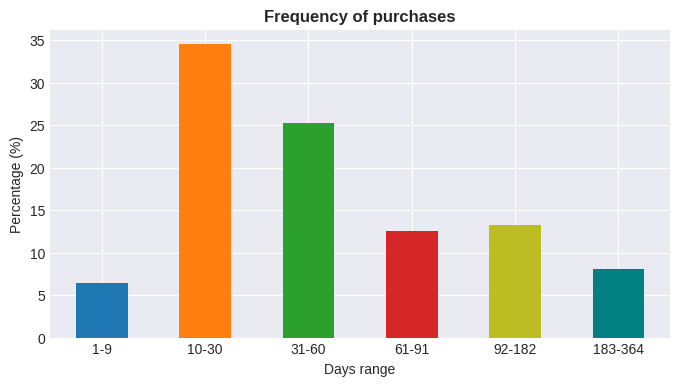

In [42]:
category_counts = df_diff_nov['PurchaseFrequency'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(8, 4))
category_counts.plot(
    kind='bar',
    color=['tab:blue','tab:orange','tab:green','tab:red', 'tab:olive', 'teal']
    )
plt.xlabel('Days range')
plt.ylabel('Percentage (%)')
plt.title('Frequency of purchases', fontweight="bold")
plt.xticks(rotation=0)
plt.show()

Based on a sample of customers who have been using our product for a long time and those of them who made orders in November, we can draw the following conclusions: \
1. In most cases customers make purchases every 10-30 days. This means that they make between 1 and 3 purchases per month. After that, there are those who make a purchase with the frequency of 2 months. Let's put these users in the first group. \
2. The second group includes users who place orders less frequently. These are the customers who make purchases with a frequency of more than 61 days. \
3. So, we have divided the users in two groups with use cases: \
1) The first ones make a purchase every 1-2 months and their natural frequency of using our online platform is **monthly**. \
2) Customers from the second group are used to making orders less frequently, so their natural frequency is **quarterly**.

In the next section, we will try to explore what determines the natural frequency of product use. We will try to complement use cases with typical persons and the problems they want to solve using our product.

### **Splitting customers by Use Cases**

Since there is not enough data to determine which use case a buyer belongs to, we can only make assumptions based on the data we have. It is clear that buyers who make purchases on a monthly basis spend more than those who do so on a quarterly basis, provided that the average cost of their purchases is the same. This is because they make more purchases over a given period of time. To determine the optimal frequency for those customers who have made only one purchase, we will begin by looking at the average number of items purchased by each customer. We assume that the higher the average number of items in a customer's order, the less often he makes purchases.

So, let's say we have two use cases (example situations):

**Use Case #1** \
Person: A wholesaler who doesn't have a warehouse. \
Problem in Person's words: I want to buy goods in small quantities. \
Natural Frequency: Monthly.

**Use Case #2** \
Person: A wholesaler who has a warehouse. \
Problem in Person's words: I want to buy goods in big quantities. \
Natural Frequency: Quarterly.

Let's select the customers whose frequency is defined. For each customer we will calculate the average quantity of goods per transaction.

In [43]:
cust_UC = pd.DataFrame(df_diff.groupby('CustomerID')[['Quantity','DaysDifference']].mean()).reset_index()
cust_UC.head() # print first 5 rows of the resulting dataframe

,CustomerID,Quantity,DaysDifference
0,12346,74215.000000,NaN
1,12347,351.142857,60.833333
2,12348,585.250000,94.333333
3,12349,631.000000,NaN
4,12350,197.000000,NaN


There are outliers in the data. Let's leave the data up to the 95th percentile.

In [44]:
cust_UC_95q = cust_UC[cust_UC.Quantity < cust_UC.Quantity.quantile(0.95)]

Let's make a scatter plot of the bought average  quantity of goods and frequency of purchase dependence.

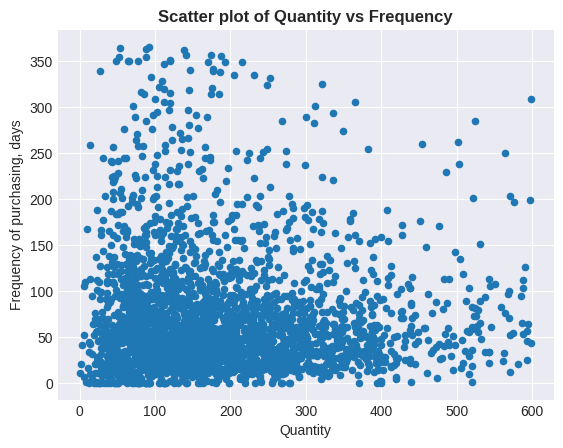

In [45]:
cust_UC_95q.plot.scatter(x='Quantity', y='DaysDifference')

plt.title('Scatter plot of Quantity vs Frequency', fontweight="bold")
plt.ylabel('Frequency of purchasing, days')
plt.show()

We see that there is no linear dependence; the data is not normally distributed. Let's try to derive the Spearman correlation coefficient.

In [46]:
r = stats.spearmanr(
    cust_UC_95q[cust_UC_95q.DaysDifference.notna()]['Quantity'],
    cust_UC_95q[cust_UC_95q.DaysDifference.notna()]['DaysDifference']
)
print(f'Spearman R coefficient: {r.correlation:.3f} \np-value: {r.pvalue:.3f}')

Spearman R coefficient: -0.019 
p-value: 0.313


The correlation coefficient is close to 0, while the p-value is clearly greater than the threshold value of 0.05, there is no obvious relationship between the variables. \
This means that we cannot accept the hypothesis that the frequency of use of a product depends on the average number of items purchased in a single transaction. Therefore, our assumption about use cases failed. \
Based on our data, we can no longer assume anything about what use case the buyer has.

Due to this, customers whose average purchase frequency is less than 61 days will be classified to use case with monthly natural frequency, and those with more than or equal to 61 days will be classified to use case with quarterly natural frequency.

In [47]:
cust_UC['UseCaseNF'] = cust_UC.DaysDifference.apply(lambda x: 'Monthly' if x < 61 else (np.nan if np.isnan(x) else 'Quarterly'))
cust_UC.head() # print first 5 rows of the resulting dataframe

,CustomerID,Quantity,DaysDifference,UseCaseNF
0,12346,74215.000000,NaN,NaN
1,12347,351.142857,60.833333,Monthly
2,12348,585.250000,94.333333,Quarterly
3,12349,631.000000,NaN,NaN
4,12350,197.000000,NaN,NaN


In [48]:
# printing a number of customers for each type of natural frequency
cust_UC.UseCaseNF.value_counts(dropna=False)

UseCaseNF
Monthly      1617
NaN          1492
Quarterly    1230
Name: count, dtype: int64

So, there are 1617 customers whose natural frequency of purchasing is montly and 1230 customers with quarterly frequency. Also there are 1230 customers who had only one transaction during the period under review. \
To classify them as one of the use cases, we will fill the NaN value in the 'UseCaseNF' column with the value from forward not NaN value. When analyzing retention and revenue, this will allow us to distribute the impact of non retained buyers on both use cases.

In [49]:
cust_UC['UseCaseNF'] = cust_UC['UseCaseNF'].fillna(method='bfill')
cust_UC.head()

,CustomerID,Quantity,DaysDifference,UseCaseNF
0,12346,74215.000000,NaN,Monthly
1,12347,351.142857,60.833333,Monthly
2,12348,585.250000,94.333333,Quarterly
3,12349,631.000000,NaN,Monthly
4,12350,197.000000,NaN,Monthly


Now, we have this frequency ratio:

In [50]:
cust_UC.UseCaseNF.value_counts(dropna=False)

UseCaseNF
Monthly      2439
Quarterly    1900
Name: count, dtype: int64

We have two categories of customers. The first category uses our product monthly to solve their problems, while the second category uses it quarterly.

We will prepare data  for further visualization and analysis. Let's select those records that have a core action. To do this, we will select the records that contain only purchase invoices. We will also leave only necessary columns.

## **Customer Retention Analysis**

In [51]:
df_usage = df_group[df_group.CancellingInvoice == False][['InvoiceNo','InvoiceDate','CustomerID','InvoiceDateFirst']]
df_usage.head() # print first 5 rows of the resulting dataframe

,InvoiceNo,InvoiceDate,CustomerID,InvoiceDateFirst
0,536365,2010-12-01,17850,2010-12-01
1,536366,2010-12-01,17850,2010-12-01
2,536367,2010-12-01,13047,2010-12-01
3,536368,2010-12-01,13047,2010-12-01
4,536369,2010-12-01,13047,2010-12-01


Let's define in which month the transaction took place in. We will also find out in which month the customer made their first purchase in order to create cohorts. At this stage, we will divide all buyers into monthly groups. Customers with a quarterly payment frequency will then be divided into four quarterly cohorts.

In [52]:
# Creating column 'MonthNumber' for transaction month
df_usage['MonthNumber'] = df_usage.InvoiceDate.apply(lambda x: 1 if x.year == 2010 else x.month + 1)
# Creating column 'Cohort' for separating customers by monthly cohorts
df_usage['MonthCohort'] = df_usage.InvoiceDateFirst.apply(lambda x: 1 if x.year == 2010 else x.month + 1)
df_usage.sample(5) # print random 5 rows of the resulting dataframe

,InvoiceNo,InvoiceDate,CustomerID,InvoiceDateFirst,MonthNumber,MonthCohort
7752,555933,2011-06-08,12567,2010-12-05,7,1
14421,572066,2011-10-20,15159,2010-12-13,11,1
3719,546030,2011-03-09,14013,2011-03-09,4,4
11742,565760,2011-09-06,12720,2010-12-05,10,1
11686,565613,2011-09-05,13744,2011-02-20,10,3


We will exclude the last month from our analysis, as it has not yet ended.

In [53]:
# excluding Dec 2011
df_usage = df_usage[df_usage.MonthNumber != 13]

For each customer, we designate his natural frequency.

In [54]:
# Creating column 'UseCaseNF' for the natural frequency
df_usage = df_usage.merge(cust_UC[['CustomerID','UseCaseNF']], how='left', on='CustomerID')

In [55]:
# Print the number of transactions for customers with monthly and quarterly natural frequency of using
df_usage.UseCaseNF.value_counts(dropna=False)

UseCaseNF
Monthly      13444
Quarterly     4344
Name: count, dtype: int64

As expected, most transactions are made by customers who are used to making purchases on a monthly basis. They have 3 times more transactions than those whose frequency is quarterly. Let's split the data in two datasets by users with monthly and quarterly natural frequency.

In [56]:
# dataframe for users with monthly NF
df_usage_monthly = df_usage[df_usage.UseCaseNF=='Monthly']

# print the resulting data for the customer with ID=17314 as an example
df_usage_monthly[df_usage_monthly.CustomerID==17314]

,InvoiceNo,InvoiceDate,CustomerID,InvoiceDateFirst,MonthNumber,MonthCohort,UseCaseNF
2349,542641,2011-01-31,17314,2011-01-31,2,2,Monthly
2401,542786,2011-02-01,17314,2011-01-31,3,2,Monthly
4491,547885,2011-03-28,17314,2011-01-31,4,2,Monthly
8547,557898,2011-06-23,17314,2011-01-31,7,2,Monthly
9372,559980,2011-07-14,17314,2011-01-31,8,2,Monthly
13942,570855,2011-10-12,17314,2011-01-31,11,2,Monthly
16088,575911,2011-11-11,17314,2011-01-31,12,2,Monthly
16302,576385,2011-11-15,17314,2011-01-31,12,2,Monthly


For users whose natural frequency is quarterly, let's also determine which quarter each month belongs to and divide users into quarterly cohorts.

In [57]:
# dataframe for users with quarterly NF
df_usage_quarterly = df_usage[df_usage.UseCaseNF=='Quarterly']

# Dividing customers by quarterly cohorts and determining a quarter number for the separate purchase
df_usage_quarterly['QuarterNumber'] = (df_usage_quarterly['MonthNumber']-1) // 3 + 1
df_usage_quarterly['QuarterCohort'] = (df_usage_quarterly['MonthCohort']-1) // 3 + 1

# removing columns 'MonthNumber' and 'MonthCohort'
df_usage_quarterly.drop(columns=['MonthNumber','MonthCohort'], inplace=True)
df_usage_quarterly[df_usage_quarterly.CustomerID==13748] # print the resulting data for the customer with ID=13748 as an example

,InvoiceNo,InvoiceDate,CustomerID,InvoiceDateFirst,UseCaseNF,QuarterNumber,QuarterCohort
6,536371,2010-12-01,13748,2010-12-01,Quarterly,1,1
4952,549190,2011-04-07,13748,2010-12-01,Quarterly,2,1
5664,550923,2011-04-21,13748,2010-12-01,Quarterly,2,1
11636,565463,2011-09-05,13748,2010-12-01,Quarterly,4,1
11637,565464,2011-09-05,13748,2010-12-01,Quarterly,4,1


### **Retention analysis of customers with monthly natural frequency of purchasing**

#### **Lifecycle bar chart**

In this subseqtion, we will plot a bar chart based on the user lifecycle in a product. After looking at it, we will be able to draw the first conclusions about user retention in the product.

To do this, we will create a new dataset in which we define user's lifecycle states for each month. Of all the states, we will focus on those that make up the core of our product's audience:
- Activated &mdash; user who has developed the habit of using the product. In our case "user"="customer", "develop the habit"="make a purchase".
- Engaged &mdash; user who performs the core action, i.e. makes a purchase. In our case, a user is considered to be engaged if he has made a purchase in both the current month and the previous month.
- Dormant &mdash; user who doesn't perform the core action. In our case, we consider a user to be dormant if he hasn't made a purchase in the current month, but has made one in the previous month.
- Resurrected &mdash; user who had to be dormant, but then resumed taking the core action. In our case this is the user, who hasn't made a purchase in the previous month, but made one in the current month.

In [58]:
# function that creates a dataframe with user states for each customers for each period according to the customer's natural frequency
def make_dataframe_by_cohorts(df, NF='Monthly'):

    # expecting only monthly or quarterly natural frequency
    # determining the number of periods according to the given natural frequency
    N_periods = 12 if NF == 'Monthly' else 4
    period_num_col = 'MonthNumber' if NF == 'Monthly' else 'QuarterNumber'
    cohort_col = 'MonthCohort' if NF == 'Monthly' else 'QuarterCohort'

    # Creating the new dataframe for customer with given NF by mapping customer and period
    unique_customers = df[df.UseCaseNF==NF]['CustomerID'].unique()
    periods = [i+1 for i in range(N_periods)]
    customers = pd.MultiIndex.from_product([unique_customers, periods], names=['CustomerID', period_num_col])
    customers_period_df = pd.DataFrame(index=customers).reset_index()

    # Determining the fact of purchase in a period for each customer
    customers_period_df = customers_period_df.merge(
        df[['CustomerID', period_num_col]],
        on=['CustomerID', period_num_col],
        how='left',
        indicator=True
        ).drop_duplicates().reset_index(drop=True)
    customers_period_df.rename(columns={'_merge':'Purchased'}, inplace=True)
    customers_period_df.Purchased = customers_period_df.Purchased.apply(lambda x: 1 if x=='both' else 0)

    # Determining the period of the first purchase for each customer (Activation Period)
    customers_period_df['Activated'] = customers_period_df.merge(
        df[['CustomerID', cohort_col]],
        left_on=['CustomerID', period_num_col],
        right_on=['CustomerID', cohort_col],
        how='left'
        ).drop_duplicates().reset_index(drop=True)[cohort_col]
    customers_period_df.Activated = (customers_period_df.Activated.notna()).astype(int)

    # Function for determining whether a customer is non-active in a month
    # Have to consider that a user can become non-active in a month only after the month of activation
    def define_nonactive(row, activation_period):
        customer_id = row['CustomerID']
        period = row[period_num_col]
        purchased = row['Purchased']
        activated = row['Activated']
        if period < activation_period[customer_id]:
            return 0
        elif purchased == 1 or activated == 1:
            return 0
        else:
            return 1

    # Dict for pairs <User>:<Activation Month>
    activation_period = customers_period_df[customers_period_df['Activated'] == 1].set_index('CustomerID')[period_num_col].to_dict()

    # Determining whether a customer is non-active for each month
    customers_period_df['NonActive'] = customers_period_df.apply(define_nonactive, axis=1, activation_period=activation_period)

    # Creating the auxiliary column 'PreviousPeriodPurchased', which shows whether there was a purchase in the previous month
    customers_period_df['PreviousPeriodPurchased'] = customers_period_df.groupby('CustomerID')['Purchased'].shift(1)

    # Determining whether user is engaged in the current period
    # Creating the 'Engaged' column, which is equal to 1 if the purchase was both in the current and in the previous period
    customers_period_df['Engaged'] = ((customers_period_df['Purchased'] == 1) &
                                    (customers_period_df['PreviousPeriodPurchased'] == 1)).astype(int)

    # Determining whether user is resurrected in the current period
    # Creating the 'Resurrected' column, which is equal to 1 if the purchase was in the current period, but not in the previous period
    customers_period_df['Resurrected'] = ((customers_period_df['Purchased'] == 1) &
                                    (customers_period_df['PreviousPeriodPurchased'] == 0) &
                                        (customers_period_df['Activated'] == 0)).astype(int)

    # Determining whether user is dormant in the current period
    # Creating a 'Dormant' column, which is equal to 1 if there was no purchase in the current period, but there was a purchase in the previous period
    customers_period_df['Dormant'] = ((customers_period_df['Purchased'] == 0) &
                                    (customers_period_df['PreviousPeriodPurchased'] == 1)).astype(int)

    # Deleting the auxiliary columns 'PreviousPeriodPurchased' and 'NonActive'
    customers_period_df = customers_period_df.drop(columns=['PreviousPeriodPurchased','NonActive'])

    return customers_period_df

In [59]:
customer_months_df = make_dataframe_by_cohorts(df=df_usage_monthly, NF='Monthly')
customer_months_df[customer_months_df.CustomerID==17314] # print the resulting data for the customer with ID=17314 as an example

,CustomerID,MonthNumber,Purchased,Activated,Engaged,Resurrected,Dormant
8268,17314,1,0,0,0,0,0
8269,17314,2,1,1,0,0,0
8270,17314,3,1,0,1,0,0
8271,17314,4,1,0,1,0,0
8272,17314,5,0,0,0,0,1
8273,17314,6,0,0,0,0,0
8274,17314,7,1,0,0,1,0
8275,17314,8,1,0,1,0,0
8276,17314,9,0,0,0,0,1
8277,17314,10,0,0,0,0,0


Let's output the resulting table by user lifecycle states and create the bar chart of Monthly Active Users.

In [60]:
df_mau = customer_months_df.groupby('MonthNumber')[['Engaged','Activated','Resurrected','Dormant']].sum()
df_mau.Dormant *= -1
df_mau['MAU'] = df_mau['Engaged'] + df_mau['Activated'] + df_mau['Resurrected']
df_mau

,Engaged,Activated,Resurrected,Dormant,MAU
MonthNumber,,,,,
1,0,507,0,0,507
2,283,189,0,-224,472
3,231,176,85,-241,492
4,266,212,151,-226,629
5,284,153,147,-345,584
6,341,144,237,-243,722
7,385,127,171,-337,683
8,340,124,223,-343,687
9,366,102,213,-321,681


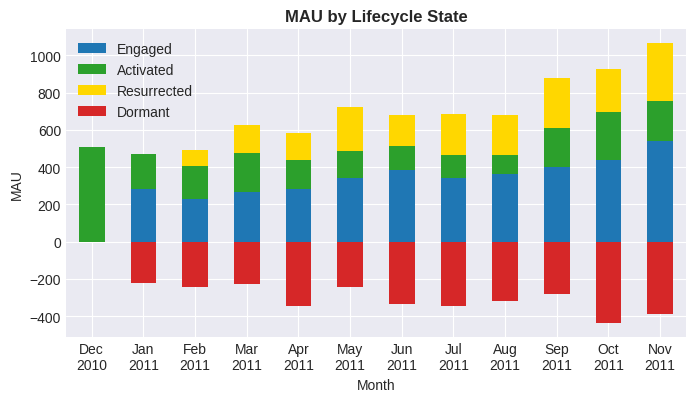

In [61]:
x_ticks = ['Dec\n2010', 'Jan\n2011', 'Feb\n2011', 'Mar\n2011', 'Apr\n2011', 'May\n2011', 'Jun\n2011', 'Jul\n2011', 'Aug\n2011', 'Sep\n2011', 'Oct\n2011', 'Nov\n2011']
ax = df_mau[['Engaged','Activated','Resurrected','Dormant']].plot.bar(
    stacked=True,
    color=['tab:blue', 'tab:green', 'gold', 'tab:red'],
    figsize=(8, 4)
)
plt.xlabel('Month')
plt.ylabel('MAU')
plt.xticks(rotation=0)
plt.title('MAU by Lifecycle State', fontweight="bold")
ax.set_xticklabels(x_ticks)
plt.show()

**Conclusions from the chart:**
1. The global MAU trend shows an increase. At the same time, the number of dormant users is also growing.
2. Each month, the number of active users exceeds the number of dormant users that month.
3. Approximately, the number of retained users is equal to the number of dormant each month.
4. In December 2010, the largest number of activated users was recorded. After that, this number started to decline. However, in September, the number increased by approximately half compared to August and remained stable.
5. Some months see an increase in the number of resurrected users.

#### **Quick Ratio metric**

The formula for the calculation the Quick Ratio metric:

$$QR = \dfrac{Activated+Resurrected}{Dormant}$$

The metric shows how many new users are gained for every one that is lost.
- If QR > 1, more people come to the product than leave.
- If QR < 1, less people come to the product than leave.
- If QR = 1, the same number of users come to the product as leave.

Let's calculate QR for each month from Jan 2011 and create the chart.

In [62]:
QR = (df_mau.loc[2:,'Activated'] + df_mau.loc[2:,'Resurrected']) / (-df_mau.loc[2:,'Dormant'])

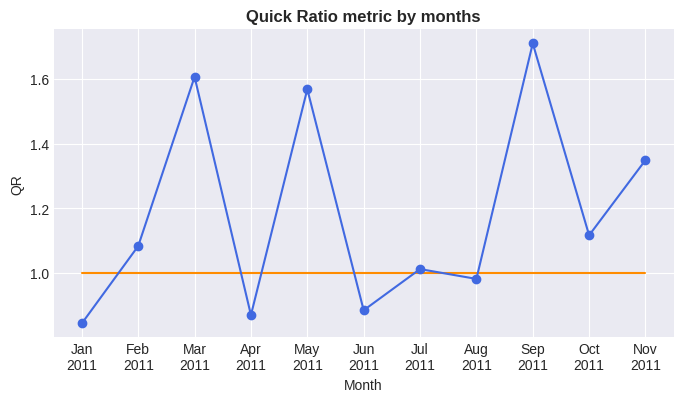

In [63]:
fig = plt.figure(figsize=(8,4))
x = np.linspace(2, 12, num=11, endpoint=True)
y = np.ones(x.shape[0])
plt.plot(x, y, color='darkorange')
plt.plot(QR, color='royalblue', marker='o')
plt.title('Quick Ratio metric by months', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('QR')
plt.xticks(ticks=x, labels=x_ticks[1:])

plt.show()

Also we will calculate the average value of the Quick Ratio.

In [64]:
print(f'Average Quick Ratio: {QR.mean():.1f}')

Average Quick Ratio: 1.2


**Conclusions according to the Quick Ratio:** \
1. In Jan, Apr, Jun, Aug fewer users came to the product than left.
2. In Mar, May, Sep >1.6 times more users joined the product than left
3. Average QR is 1.2. It means that on average, more people join the product than leave every month.

#### **Retention Rate and Time-To-Habit**

For further analysis, we need to create cohort charts and retention curves.

In [65]:
# Function that returns a dict with cohorts as keys and a list of active users by months for the cohort
def make_cohort_data(df):
    dict_cohort = {}
    max_month = df['MonthNumber'].max()
    for i in range(1, max_month+1):
        cohort_array = df[df.MonthCohort == i]['CustomerID'].to_list()
        extended_array = np.full(max_month, np.nan)
        extended_array[:len(cohort_array)] = cohort_array
        dict_cohort[i] = extended_array
    return dict_cohort

# Dataframe with the number of unique customers by cohorts that have made the core action for each months after the first purchase
df_ret = pd.DataFrame(df_usage_monthly.groupby(['MonthCohort','MonthNumber'])['CustomerID'].nunique()).reset_index()

# Creating a cohort chart
cohort_months = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
cohorts_usage = pd.DataFrame(make_cohort_data(df_ret), index=np.arange(1,13)).T
cohorts_usage.index = cohort_months

We will export data to Excel for more convenient presentation and use of conditional formatting.

In [66]:
cohorts_usage.to_excel('/content/gdrive/MyDrive/Colab Notebooks/retention_monthly_cohorts.xlsx')

As a result, we created the following table. The rows show the months of the first purchase, i.e. cohorts, by columns &mdash; months after the first purchase. The cell contains the number of users from cohort M who performed the core action in month N. For example, in March 212 new customers came to the product, and by month 3 (June) only 63 of them returned and made a purchase again.

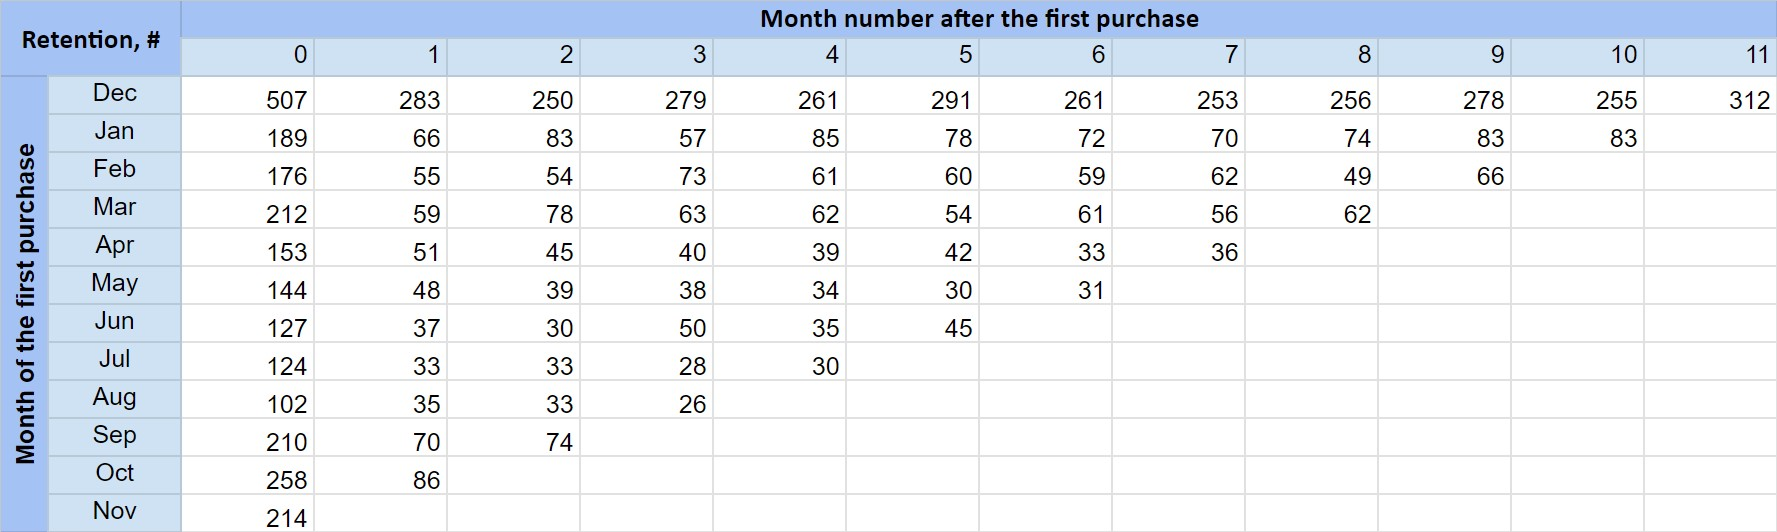

We will also calculate the share of people from cohort M who returned to the product and completed the core action for period N. Thus, of all the customers of the March cohort, only about 29.7% returned for the 3rd month. In addition, we will calculate the average for each month after the first purchase. This will allow us to plot the retention curve across all cohorts and evaluate how users are retained in our product over time.

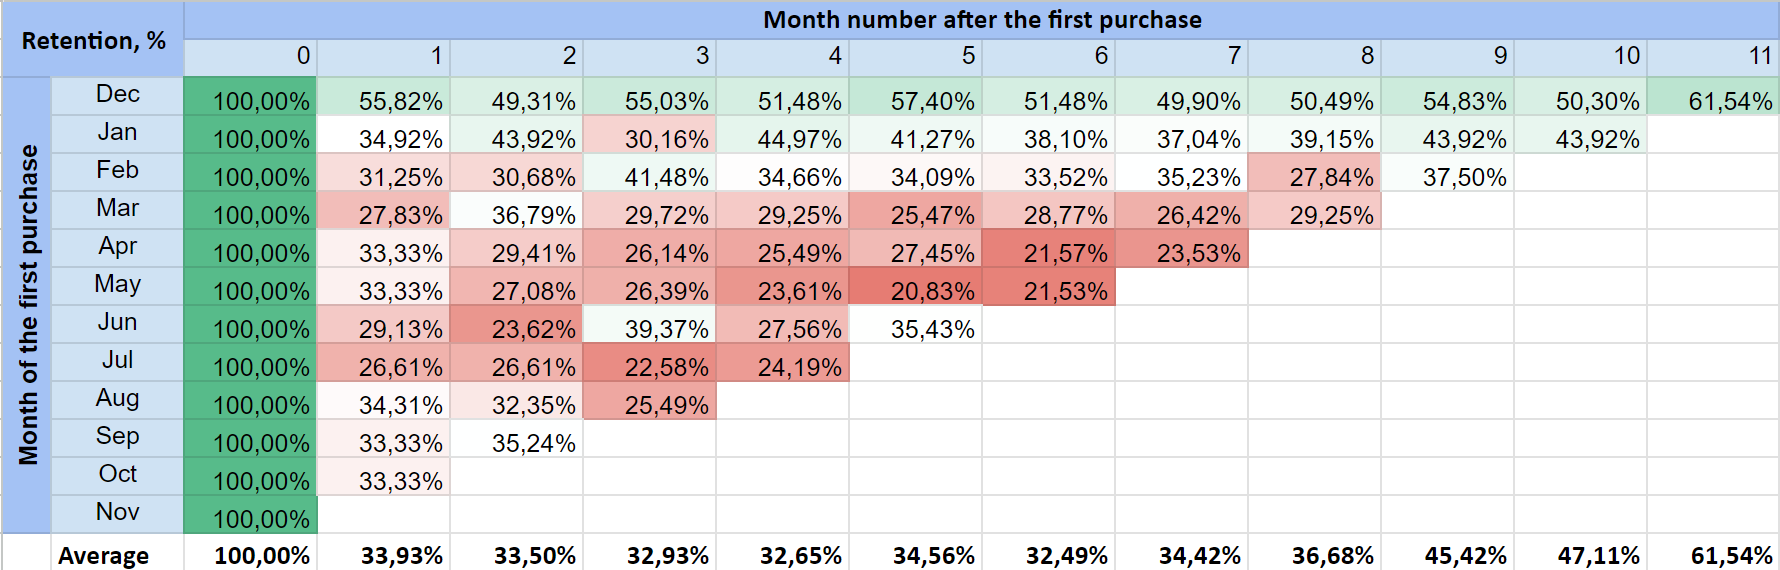

In [67]:
# reading up above table to plot the retention curve
retention_perc = pd.read_excel(
    '/content/gdrive/MyDrive/Colab Notebooks/retention_monthly_cohorts_edited.xlsx',
    sheet_name='Retention % to read',
    index_col='Cohort'
    )

# calculating average share
n_period_retention = retention_perc.mean(axis=0)

Let's plot the Retention Curve.

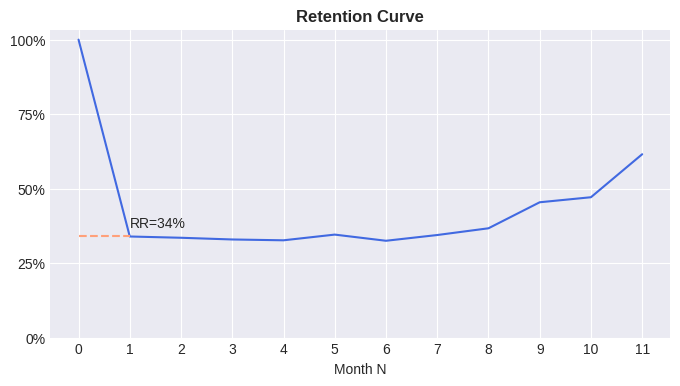

In [68]:
fig = plt.figure(figsize=(8,4))
x = np.linspace(1, 12, num=12, endpoint=True)
y = np.linspace(0, 1, num=5)
RR = n_period_retention.values[1]
ylabels = np.char.add((np.linspace(0, 100, num=5)).astype(int).astype(str), '%')
plt.plot(x, n_period_retention, color='royalblue')
plt.plot([1,2],[RR, RR], linestyle='dashed', color='lightsalmon')
plt.title('Retention Curve', fontweight='bold')
plt.xlabel('Month N')
plt.yticks(ticks=y, labels=ylabels)
plt.xticks(ticks=x, labels=(x-1).astype(int))

plt.text(2, RR+0.03, f'RR={RR*100:.0f}%')

plt.show()

**Сonclusions** \
1. We see that the retention curve is shaped like a smile. This means that over time, more and more people begin to return to the product.
2. The curve reaches a plateau already in the first month and First Month Retention is 34%. This means that on average, 34% of users find value in using a product and develop a habit of using it. Therefore for our product Time-To-Habit is 1 month and the Retention Rate equals to 34%.

#### **Shifting and Slope**

Let's plot the retention curve by cohorts and check if there is difference between them.

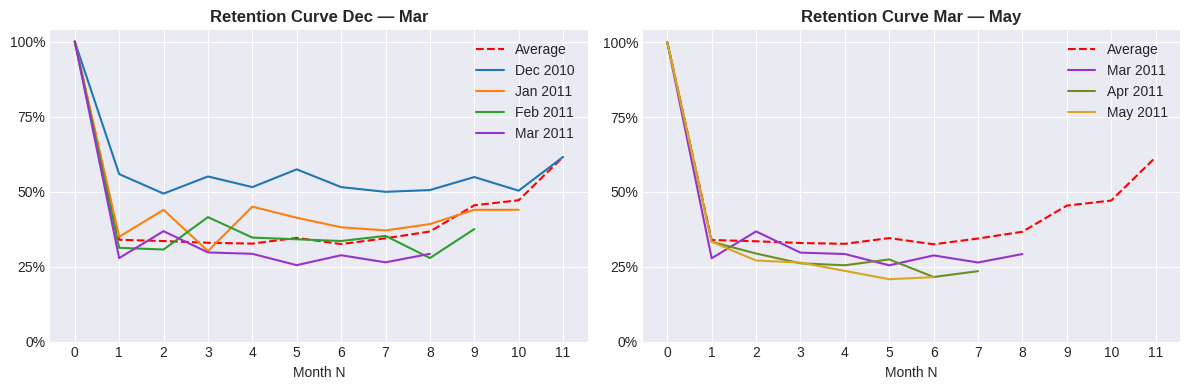

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
x = np.linspace(0, 11, num=12, endpoint=True)
y = np.linspace(0, 1, num=5)
ylabels = np.char.add((np.linspace(0, 100, num=5)).astype(int).astype(str), '%')

# left chart
ax1.plot(x, n_period_retention, linestyle='dashed', label='Average', color='r')
ax1.plot(x, retention_perc.loc['Dec',:], label='Dec 2010')
ax1.plot(x, retention_perc.loc['Jan',:], label='Jan 2011')
ax1.plot(x, retention_perc.loc['Feb',:], label='Feb 2011')
ax1.plot(x, retention_perc.loc['Mar',:], label='Mar 2011', color='darkorchid')
ax1.set_title('Retention Curve Dec — Mar', fontweight='bold')
ax1.legend()
ax1.set_xlabel('Month N')
ax1.set_yticks(ticks=y, labels=ylabels)
ax1.set_xticks(ticks=x, labels=x.astype(int))

#right chart
ax2.plot(x, n_period_retention, linestyle='dashed', label='Average', color='r')
ax2.plot(x, retention_perc.loc['Mar',:], label='Mar 2011', color='darkorchid')
ax2.plot(x, retention_perc.loc['Apr',:], label='Apr 2011', color='olivedrab')
ax2.plot(x, retention_perc.loc['May',:], label='May 2011', color='goldenrod')
ax2.set_title('Retention Curve Mar — May', fontweight='bold')
ax2.legend()
ax2.set_xlabel('Month N')
ax2.set_yticks(ticks=y, labels=ylabels)
ax2.set_xticks(ticks=x, labels=x.astype(int))

plt.tight_layout()
plt.show()

**Сonclusions** \
1. Users of the December cohort stand out from the rest and are retained better.
2. After a month from the first purchasing month, retention decreases from cohort to cohort and then stabilizes around the average value. Thus, first month retention decreases to 27% in the March cohort, and in subsequent cohorts it increases slightly and stabilizes at 34%.
3. In the part of the curves where they reach a plateau, the shiftings are preserved. However, retention continues to dicrease for the April and May cohorts and flattens only at month 5-6. So, for example, the difference in first month retention between the January and May cohorts was 1.5%, and by the 6th month it increased to 17%.
4. Despite the fact that N-period Retention falls from cohort to cohort, in each cohort the curve flattens out and doesn't go to 0. Moreover, in earlier cohorts an increase in the number of active users is visible, starting from about 8th month.

#### **Outliers**

Let's create the cohort chart based on deviations from the average value for each period. So, for example, for the March cohort, in the 5th month after the first purchase, Retention is 9% less than the average for this period.

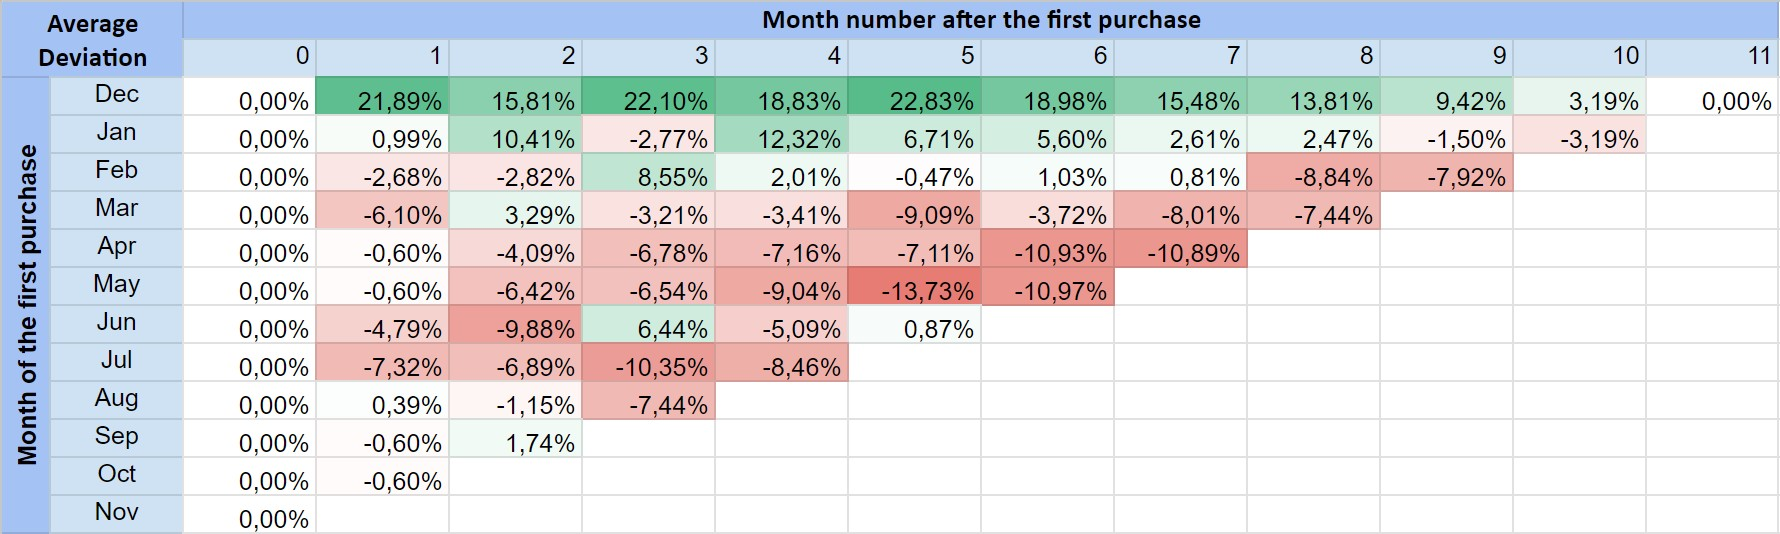

**Сonclusions** \
1. As was revealed earlier, the retention of users of the December cohort is clearly better than that of other cohorts.
2. In October, there was a drop in the number of active users in the cohorts from February to July.
3. For the June cohort, we see a significant increase in the number of active users in month 3, compared to neighboring cohorts.

### **Retention analysis of customers with quarterly natural frequency of purchasing**

#### **Lifecycle bar chart**

Let's plot the same chart for the customers with quarterly natural frequency of using our product.

In [70]:
customer_quarters_df = make_dataframe_by_cohorts(df=df_usage_quarterly, NF='Quarterly')
customer_quarters_df[customer_quarters_df.CustomerID==14447] # print the resulting data for the customer with ID=14447 as an example

,CustomerID,QuarterNumber,Purchased,Activated,Engaged,Resurrected,Dormant
3388,14447,1,0,0,0,0,0
3389,14447,2,1,1,0,0,0
3390,14447,3,0,0,0,0,1
3391,14447,4,1,0,0,1,0


Let's output the resulting table by user lifecycle states and create the bar chart of Quarterly Active Users.

In [71]:
df_qau = customer_quarters_df.groupby('QuarterNumber')[['Engaged','Activated','Resurrected','Dormant']].sum()
df_qau.Dormant *= -1
df_qau['QAU'] = df_qau['Engaged'] + df_qau['Activated'] + df_qau['Resurrected']
df_qau

,Engaged,Activated,Resurrected,Dormant,QAU
QuarterNumber,,,,,
1,0,810,0,0,810
2,322,527,0,-488,849
3,319,246,181,-530,746
4,427,299,465,-319,1191


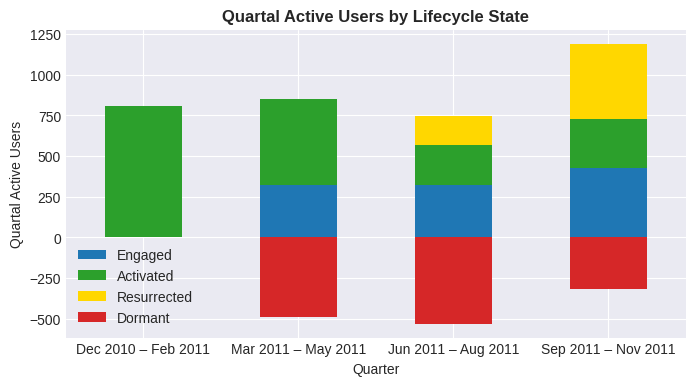

In [72]:
x_ticks_quarters = ['Dec 2010 – Feb 2011', 'Mar 2011 – May 2011', 'Jun 2011 – Aug 2011', 'Sep 2011 – Nov 2011']
ax = df_qau[['Engaged','Activated','Resurrected','Dormant']].plot.bar(
    stacked=True,
    color=['tab:blue', 'tab:green', 'gold', 'tab:red'],
    figsize=(8, 4)
)
plt.xlabel('Quarter')
plt.ylabel('Quartal Active Users')
plt.xticks(rotation=0)
plt.title('Quartal Active Users by Lifecycle State', fontweight="bold")
ax.set_xticklabels(x_ticks_quarters)
plt.show()

**Conclusions from the chart:**
1. In the first three quarters, the number of active users is about the same. In Q4, the number of activated, engaged and resurrected users increased, while the number of dormant users decreased significantly.
2. Each quarter, the number of active users exceeds the number of dormant users that month.
3. In Q2 and Q3, the number of dormant users is higher than the number of engaged (retained from previous periods) users, but in the Q4 the situation is changing in the opposite direction.
4. In the period from December 2010 to February 2011, the largest number of activated users was recorded. After that, this number started to decline. However, in the fourth quarter, the number slightly increased.
5. In the Q4, there was a significant increase in the number of resurrected users.

#### **Quick Ratio metric**

Let's explore the Quick Ratio metric for users whose natural frequency is quarterly.

In [73]:
QR_q = (df_qau.loc[2:,'Activated'] + df_qau.loc[2:,'Resurrected']) / (-df_qau.loc[2:,'Dormant'])

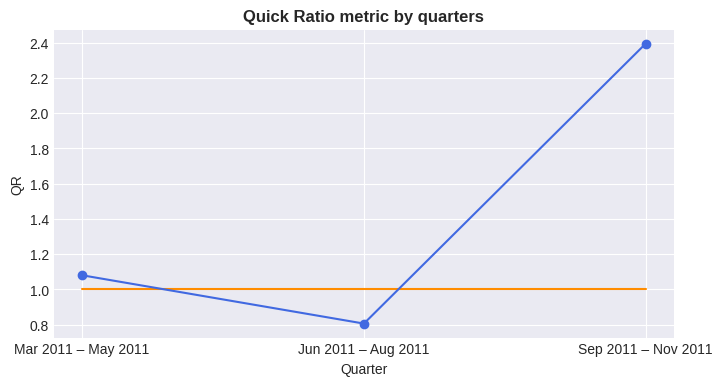

In [74]:
fig = plt.figure(figsize=(8,4))
x = np.linspace(2, 4, num=3, endpoint=True)
y = np.ones(x.shape[0])
plt.plot(x, y, color='darkorange')
plt.plot(QR_q, color='royalblue', marker='o')
plt.title('Quick Ratio metric by quarters', fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('QR')
plt.xticks(ticks=x, labels=x_ticks_quarters[1:])

plt.show()

Also we will calculate the average value of the Quick Ratio.

In [75]:
print(f'Average Quick Ratio: {QR_q.mean():.1f}')

Average Quick Ratio: 1.4


**Conclusions according to the Quick Ratio:** \
1. In Q3 (Jun 2011 &mdash; Aug 2011) fewer users came to the product than left.
2. In Q2 and Q4 more users joined the product than left. Moreover, in Q4, the number of users who came was 2.4 times higher than those who left.
3. Average QR is 1.4. It means that on average, more people join the product than leave every quarter.

#### **Retention Rate and Time-To-Habit**

In [76]:
# Function that returns a dict with cohorts as keys and a list of active users by quarters for the cohort
def make_cohort_data_q(df):
    dict_cohort = {}
    max_quarter = df['QuarterNumber'].max()
    for i in range(1, max_quarter+1):
        cohort_array = df[df.QuarterCohort == i]['CustomerID'].to_list()
        extended_array = np.full(max_quarter, np.nan)
        extended_array[:len(cohort_array)] = cohort_array
        dict_cohort[i] = extended_array
    return dict_cohort

# Dataframe with the number of unique customers by cohorts that have made the core action for each quarter after the first purchase
df_ret_q = pd.DataFrame(df_usage_quarterly.groupby(['QuarterCohort','QuarterNumber'])['CustomerID'].nunique()).reset_index()

# Creating a cohort chart
cohort_quarters = [1, 2, 3, 4]
cohorts_usage_q = pd.DataFrame(make_cohort_data_q(df_ret_q), index=np.arange(1,5)).T
cohorts_usage_q.index = cohort_quarters

We will export data to Excel for more convenient presentation and use of conditional formatting.

In [77]:
cohorts_usage_q.to_excel('/content/gdrive/MyDrive/Colab Notebooks/retention_quarterly_cohorts.xlsx')

As a result, we created the following table. The rows show the quarters of the first purchase, i.e. cohorts, by columns &mdash; quarters after the first purchase. The cell contains the number of users from cohort M who performed the core action in month N. For example, in Q2 527 new customers came to the product, and by quarter 1 only 162 of them returned and made a purchase again.

<img src="https://drive.google.com/uc?export=view&id=1vjZfDIvzy9EqL2b-v_jRTyZDTNBWzHjP" width="500">


We will also calculate the share of people from cohort M who returned to the product and completed the core action for period N. Thus, of all the customers of the Q2 cohort, only about 30.7% returned for the 1st quarter. In addition, we will calculate the average for each quarter after the first purchase. This will allow us to plot the retention curve across all cohorts and evaluate how users are retained in our product over time.

<img src="https://drive.google.com/uc?export=view&id=1YdVtOf8BSCw6PwIOnAnzKq4PfgCjJfQH" width="500">

In [78]:
# reading up above table to plot the retention curve
retention_perc_q = pd.read_excel(
    '/content/gdrive/MyDrive/Colab Notebooks/retention_quarterly_cohorts_edited.xlsx',
    sheet_name='Retention % to read',
    index_col='Cohort'
    )

# calculating average share
n_period_retention_q = retention_perc_q.mean()

Let's plot the Retention Curve.

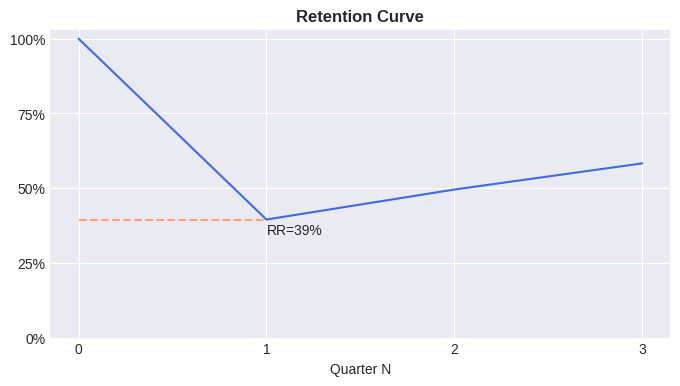

In [79]:
fig = plt.figure(figsize=(8,4))
x = np.linspace(0, 3, num=4, endpoint=True)
y = np.linspace(0, 1, num=5)
RR_q = n_period_retention_q.values[1]
ylabels = np.char.add((np.linspace(0, 100, num=5)).astype(int).astype(str), '%')
plt.plot(x, n_period_retention_q, color='royalblue')
plt.plot([0,1],[RR_q, RR_q], linestyle='dashed', color='lightsalmon')
plt.title('Retention Curve', fontweight='bold')
plt.xlabel('Quarter N')
plt.yticks(ticks=y, labels=ylabels)
plt.xticks(ticks=x, labels=x.astype(int))
plt.text(1, RR_q-0.05, f'RR={RR_q*100:.0f}%')

plt.show()

**Сonclusions** \
1. We see that the retention curve is shaped like a smile. This means that over time, more and more people begin to return to the product.
2. The curve reaches a minimum in the first quarter and First Quarter Retention is 39% vs 34% of the First Month Retention for users with monthly natural frequency. This means that on average, 39% of users find value in using a product and develop a habit of using it. Therefore for our product Time-To-Habit is 1 quarter and the Retention Rate equals to 39%.

#### **Shifting and Slope**

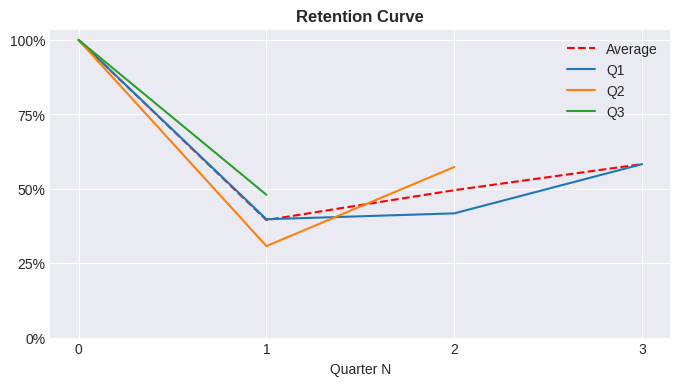

In [80]:
fig = plt.figure(figsize=(8,4))
x = np.linspace(0, 3, num=4, endpoint=True)
y = np.linspace(0, 1, num=5)
ylabels = np.char.add((np.linspace(0, 100, num=5)).astype(int).astype(str), '%')
plt.plot(x, n_period_retention_q, linestyle='dashed', label='Average', color='r')
plt.plot(x, retention_perc_q.loc['Q1',:], label='Q1')
plt.plot(x, retention_perc_q.loc['Q2',:], label='Q2')
plt.plot(x, retention_perc_q.loc['Q3',:], label='Q3')

plt.title('Retention Curve', fontweight='bold')
plt.legend()
plt.xlabel('Quarter N')
plt.yticks(ticks=y, labels=ylabels)
plt.xticks(ticks=x, labels=x.astype(int))


plt.show()

**Сonclusions** \
1. At the time of the first quarter after the first purchase, we see that users from the Q3 cohort are retained best, and those from the Q2 cohort are the worst retained. That is, a small number of users from the Q2 cohort made a purchase again 1 quarter after the first purchase, but in the next cohort Q3, the share of those who returned in the first quarter increased, the user experience was improved.
2. The share of active users in the Q2 cohort increased significantly by 27% in the second quarter compared to the first quarter after the first purchase. This indicates that a significant number of users who had not made a purchase in the previous quarter returned to the product in the next quarter.
3. None of the curves go to 0, which means that the product continues to benefit users and they continue to make purchases. At the same time, users who were inactive in previous periods are beginning to return to the product.

#### **Outliers**

<img src="https://drive.google.com/uc?export=view&id=1GPyug7MzOMbbengu30dDBgghK1RGvoi8" width="500">


**Сonclusions** \
1. In the third quarter (Jun-Aug), there was a significant decline in the number of retained users (by about 8% relative to the average for all quarters), but in the fourth quarter (Sep-Nov), their number increased significantly.

## **Revenue Analysis**

We will prepare data for further visualization and analysis. Let's create a new dataframe and select the necessary columns.

In [81]:
df_rev = df_group[['CustomerID', 'InvoiceDate', 'InvoiceDateFirst', 'GMV']]
df_rev.head() # print first 5 rows of the resulting dataframe

,CustomerID,InvoiceDate,InvoiceDateFirst,GMV
0,17850,2010-12-01,2010-12-01,139.12
1,17850,2010-12-01,2010-12-01,22.20
2,13047,2010-12-01,2010-12-01,278.73
3,13047,2010-12-01,2010-12-01,70.05
4,13047,2010-12-01,2010-12-01,17.85


Let's define in which month the transaction took place in. We will also find out in which month the customer made their first purchase in order to create cohorts.

In [82]:
# defining the number of the month
df_rev['MonthNumber'] = df_rev.InvoiceDate.apply(lambda x: 1 if x.year == 2010 else x.month + 1)

# defining cohort
df_rev['MonthCohort'] = df_rev.InvoiceDateFirst.apply(lambda x: 1 if x.year == 2010 else x.month + 1)
df_rev.sample(5)

,CustomerID,InvoiceDate,InvoiceDateFirst,GMV,MonthNumber,MonthCohort
14287,12360,2011-10-18,2011-05-23,1043.78,11,6
13400,13458,2011-10-05,2010-12-15,498.36,11,1
20789,12693,2011-08-11,2011-01-24,-9.95,9,2
20600,17581,2011-07-20,2010-12-02,-13.38,8,1
16234,17081,2011-11-14,2011-10-24,177.01,12,11


We will exclude the last month from our analysis, as it has not yet ended.

In [83]:
# excluding Dec 2011
df_rev = df_rev[df_rev.MonthNumber != 13]

For each customer, we designate his natural frequency.

In [84]:
# Creating column 'UseCaseNF' for the natural frequency
df_rev = df_rev.merge(cust_UC[['CustomerID','UseCaseNF']], how='left', on='CustomerID')
df_rev.sample(5) # print random 5 rows of the dataframe

,CustomerID,InvoiceDate,InvoiceDateFirst,GMV,MonthNumber,MonthCohort,UseCaseNF
17084,13969,2011-11-23,2010-12-09,308.46,12,1,Monthly
19122,12476,2011-05-20,2010-12-13,-29.90,6,1,Monthly
11140,14769,2011-08-23,2010-12-17,312.66,9,1,Monthly
17498,15022,2011-11-28,2011-10-23,214.76,12,11,Monthly
1087,16161,2010-12-15,2010-12-06,209.65,1,1,Monthly


### **General Revenue Analysis**

In this seqtion, we will perform a general revenue analysis. We will take a look at the dynamics of changes in revenue in the context of customers with monthly and quarterly natural frequency, determine what causes the change in revenue, as well as how new and repeat revenue changes.



Let's create a table with monthly revenue splitted by customers with monthly and quarterly natural frequency. We will also take into account the fact that customers have cancelled part of their orders.

In [85]:
df_rev_by_months_and_UC = pd.DataFrame(df_rev.groupby(['MonthNumber','UseCaseNF'])['GMV'].sum()).reset_index()
monthly_UC = df_rev_by_months_and_UC[df_rev_by_months_and_UC.UseCaseNF=='Monthly']
quarterly_UC = df_rev_by_months_and_UC[df_rev_by_months_and_UC.UseCaseNF=='Quarterly']
df_rev_by_months_and_UC = monthly_UC[['MonthNumber','GMV']].merge(quarterly_UC[['MonthNumber','GMV']], how='inner', on='MonthNumber')
df_rev_by_months_and_UC.rename(
    columns={'GMV_x':'Customers with montlhy purchase frequency', 'GMV_y':'Customers with quarterly purchase frequency'},
    inplace=True
    )
df_rev_by_months_and_UC.set_index(df_rev_by_months_and_UC.columns[0], inplace=True)
df_rev_by_months_and_UC /= 1000 # dividing the revenue value by 1000 for convenience

# Calculating the percentage ratio
df_rev_by_months_and_UC_percentage = df_rev_by_months_and_UC.div(df_rev_by_months_and_UC.sum(axis=1), axis=0).mul(100).round(2)

df_rev_by_months_and_UC.round(2) # print the resulting table

,Customers with montlhy purchase frequency,Customers with quarterly purchase frequency
MonthNumber,,
1,423.26,134.64
2,371.83,103.90
3,331.86,104.15
4,451.51,127.66
5,329.53,95.75
6,528.79,118.23
7,504.53,102.35
8,483.56,97.17
9,508.31,106.77


Let's calculate the total revenue by customer types.

In [86]:
print(
    'Total Revenue for customers with monthly NF: £', round((df_rev_by_months_and_UC.sum()*1000)[0]),
    '\nTotal Revenue for customers with quarterly NF: £', round((df_rev_by_months_and_UC.sum()*1000)[1]),
    '\nTotal Revenue: £', round((df_rev_by_months_and_UC.sum()*1000)[0]) + round((df_rev_by_months_and_UC.sum()*1000)[1])
)

Total Revenue for customers with monthly NF: £ 6374481 
Total Revenue for customers with quarterly NF: £ 1578960 
Total Revenue: £ 7953441


Next, we will plot the revenue bar chart by months.

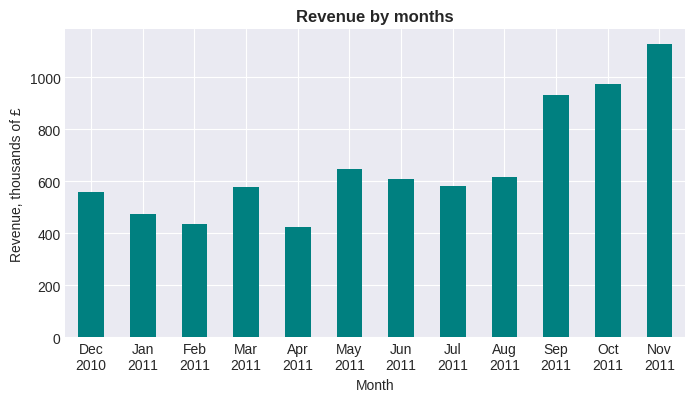

In [87]:
ax = df_rev_by_months_and_UC.sum(axis=1).plot.bar(
    color='teal',
    figsize=(8, 4)
)
plt.xlabel('Month')
plt.ylabel('Revenue, thousands of £')
plt.xticks(rotation=0)
plt.title('Revenue by months', fontweight="bold")
ax.set_xticklabels(x_ticks)
plt.show()

**Conclusions from the chart** \
1. From December 2010 to April 2011, revenue is decreasing from 557 to 425 thousand pounds, but revenue in March stands out against the background of the fall.
2. In May, revenue increased to 647 thousand pounds and remained at approximately the same level until August inclusive.
3. Revenue growth begins strongly in September and reaches £1.125 million in November.

Revenue per month is equal to the number of clients multiplied by the amount of money received from one client. Let's split the revenue into these components. Next, let's create a chart for these components and take a look at the dynamics of change.

In [88]:
df_rev_comp = pd.DataFrame(df_rev.groupby('MonthNumber').agg({'CustomerID':'nunique', 'GMV':'sum'}))
df_rev_comp.rename(columns={'CustomerID':'NumberOfUniqueCustomers','GMV':'ARPC'}, inplace=True)
df_rev_comp.ARPC /= df_rev_comp.NumberOfUniqueCustomers # calculating ARPC

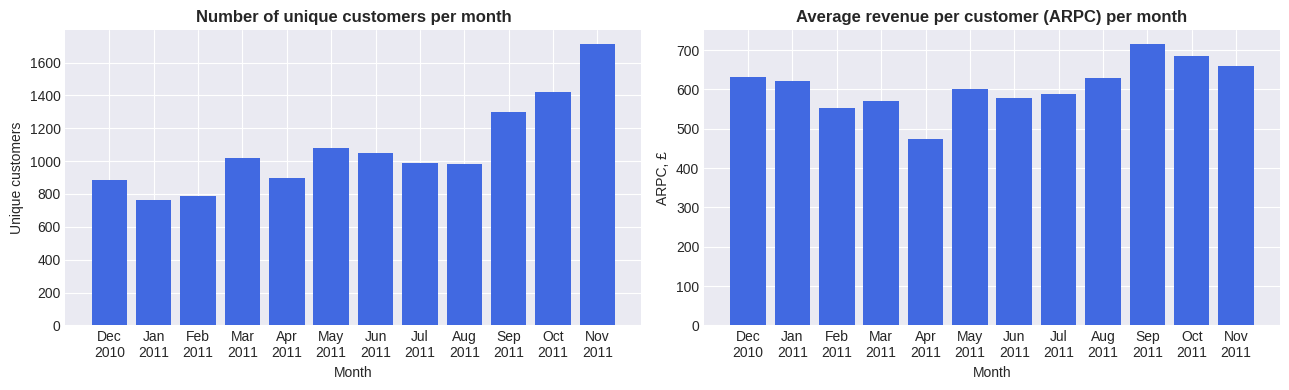

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# left chart
ax1.bar(
    x_ticks,
    height = df_rev_comp['NumberOfUniqueCustomers'],
    color='royalblue'
)
ax1.set_xlabel('Month')
ax1.set_ylabel('Unique customers')
ax1.set_title('Number of unique customers per month', fontweight="bold")

# right chart
ax2.bar(
    x_ticks,
    height = df_rev_comp['ARPC'],
    color='royalblue'
)
ax2.set_xlabel('Month')
ax2.set_ylabel('ARPC, £')
ax2.set_title('Average revenue per customer (ARPC) per month', fontweight="bold")

plt.tight_layout()
plt.show()

**Conclusions from the charts** \
1. Our revenue has grown significantly over the past 12 months. This has been due to an increase in the number of customers, as can be seen in the charts, while the average revenue per customer per month has remained relatively stable for the year. Over the year, the number of customers increased by 93% from 885 to 1711, and the average revenue per customer fluctuated around £600.

Let's plot charts to see if the increase in the number of customers is observed for a specific use case or for both. Along with these charts, let's also look at what revenue customers bring in, also divided by use cases.

In [90]:
df_unique_customers_by_NF = pd.DataFrame(df_rev.groupby(['MonthNumber','UseCaseNF'])['CustomerID'].nunique()).reset_index()
customers_monthly_UC = df_unique_customers_by_NF[df_unique_customers_by_NF.UseCaseNF=='Monthly']
customers_quarterly_UC = df_unique_customers_by_NF[df_unique_customers_by_NF.UseCaseNF=='Quarterly']
df_unique_customers_by_NF = customers_monthly_UC[['MonthNumber','CustomerID']].merge(customers_quarterly_UC[['MonthNumber','CustomerID']], how='inner', on='MonthNumber')
df_unique_customers_by_NF.rename(
    columns={'CustomerID_x':'MonthlyUniqueCustomers', 'CustomerID_y':'QuarterlyUniqueCustomers'},
    inplace=True
    )
df_unique_customers_by_NF.set_index(df_unique_customers_by_NF.columns[0], inplace=True)

# Calculating the percentage ratio
df_unique_customers_by_NF_percentage = df_unique_customers_by_NF.div(df_unique_customers_by_NF.sum(axis=1), axis=0).mul(100).round(2)

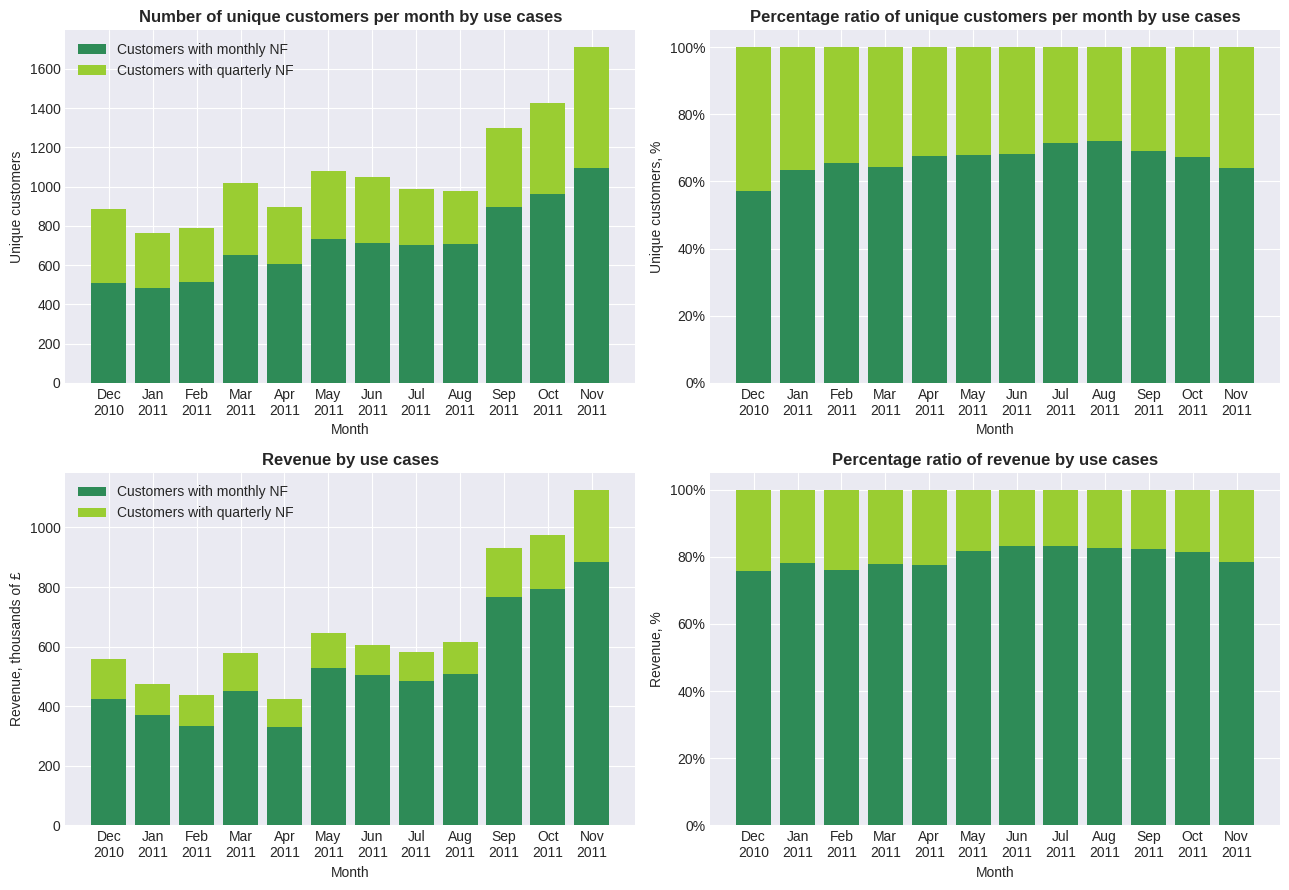

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(13, 9))

# upper left chart
axes[0,0].bar(
    x_ticks,
    height = df_unique_customers_by_NF['MonthlyUniqueCustomers'],
    color='seagreen',
    label='Customers with monthly NF'
)
axes[0,0].bar(
    x_ticks,
    height = df_unique_customers_by_NF['QuarterlyUniqueCustomers'],
    bottom = df_unique_customers_by_NF['MonthlyUniqueCustomers'],
    color='yellowgreen',
    label='Customers with quarterly NF'
)
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Unique customers')
axes[0,0].set_title('Number of unique customers per month by use cases', fontweight="bold")
axes[0,0].legend()

# upper right chart
axes[0,1].bar(
    x_ticks,
    height = df_unique_customers_by_NF_percentage['MonthlyUniqueCustomers'],
    color='seagreen'
)
axes[0,1].bar(
    x_ticks,
    height = df_unique_customers_by_NF_percentage['QuarterlyUniqueCustomers'],
    bottom = df_unique_customers_by_NF_percentage['MonthlyUniqueCustomers'],
    color='yellowgreen'
)
y = np.linspace(0, 1, num=6)
ylabels = np.char.add((np.linspace(0, 100, num=6)).astype(int).astype(str), '%')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Unique customers, %')
axes[0,1].set_title('Percentage ratio of unique customers per month by use cases', fontweight="bold")
axes[0,1].set_yticks(y*100, labels=ylabels)

# lower left chart
axes[1,0].bar(
    x_ticks,
    height = df_rev_by_months_and_UC['Customers with montlhy purchase frequency'],
    color='seagreen',
    label='Customers with monthly NF'
)
axes[1,0].bar(
    x_ticks,
    height = df_rev_by_months_and_UC['Customers with quarterly purchase frequency'],
    bottom = df_rev_by_months_and_UC['Customers with montlhy purchase frequency'],
    color='yellowgreen',
    label='Customers with quarterly NF'
)
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Revenue, thousands of £')
axes[1,0].set_title('Revenue by use cases', fontweight="bold")
axes[1,0].legend()

# lower right chart
axes[1,1].bar(
    x_ticks,
    height = df_rev_by_months_and_UC_percentage['Customers with montlhy purchase frequency'],
    color='seagreen'
)
axes[1,1].bar(
    x_ticks,
    height = df_rev_by_months_and_UC_percentage['Customers with quarterly purchase frequency'],
    bottom = df_rev_by_months_and_UC_percentage['Customers with montlhy purchase frequency'],
    color='yellowgreen'
)
y = np.linspace(0, 1, num=6)
ylabels = np.char.add((np.linspace(0, 100, num=6)).astype(int).astype(str), '%')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Revenue, %')
axes[1,1].set_title('Percentage ratio of revenue by use cases', fontweight="bold")
axes[1,1].set_yticks(y*100, labels=ylabels)

plt.tight_layout()

plt.show()

**Сonclusions from the charts** \
1. From December 2010 to August 2011, there is an increase in the number of customers with a monthly natural frequency of using the product from 507 to 707 unique customers, while there is no increase in the number of customers with a quarterly frequency. This can also be seen in the percentage ratio chart: in December, the ratio of the number of customers with a monthly frequency to the number of customers with a quarterly frequency is 57/42, and in August it is 72/27. From September to November, growth was observed in both segments.
2. Despite the fact that the percentage of customers with a monthly frequency to customers with a quarterly frequency hovers around 65%, about 80% of revenue comes from customers who make orders with monthly frequency. This is because they place more orders per month, so ARPC for customers with a monthly natural frequency is greater than ARPC for customers with a quarterly one.

Every month new customers come to our online store who have not used it before. At the same time, there are buyers who make repeat purchases. Let's look at the share of revenue splitted by these segments.

In [92]:
# Determining what type of revenue a particular invoice belongs to
df_rev['TypeOfRevenue'] = df_rev.apply(
    lambda row: 'New' if row['MonthNumber'] == row['MonthCohort'] else 'Repeat',
    axis = 1
)
df_rev.sample(5)

,CustomerID,InvoiceDate,InvoiceDateFirst,GMV,MonthNumber,MonthCohort,UseCaseNF,TypeOfRevenue
260,13408,2010-12-03,2010-12-01,534.00,1,1,Monthly,New
2685,14606,2011-02-08,2010-12-01,103.10,3,1,Monthly,Repeat
3577,14057,2011-03-04,2010-12-14,99.00,4,1,Monthly,Repeat
2353,17373,2011-01-31,2011-01-31,145.25,2,2,Quarterly,New
2981,16745,2011-02-17,2011-02-01,296.15,3,3,Monthly,New


In [93]:
# Groupping revenue by month and divide it into segments into new and repeat
df_rev_by_type = pd.DataFrame(df_rev.groupby(['MonthNumber','TypeOfRevenue'])['GMV'].sum()).reset_index()
new_rev = df_rev_by_type[df_rev_by_type.TypeOfRevenue=='New']
repeat_rev = df_rev_by_type[df_rev_by_type.TypeOfRevenue=='Repeat']
df_rev_by_type = new_rev[['MonthNumber','GMV']].merge(repeat_rev[['MonthNumber','GMV']], how='left', on='MonthNumber')
df_rev_by_type.rename(
    columns={'GMV_x':'New Revenue', 'GMV_y':'Repeat Revenue'},
    inplace=True
    )
df_rev_by_type.set_index(df_rev_by_type.columns[0], inplace=True)
df_rev_by_type /= 1000 # dividing the revenue value by 1000 for convenience
df_rev_by_type = df_rev_by_type.fillna(0)

# Calculating the percentage ratio by new and repeat revenue
df_rev_by_type_percentage = df_rev_by_type.div(df_rev_by_type.sum(axis=1), axis=0).mul(100).round(2)

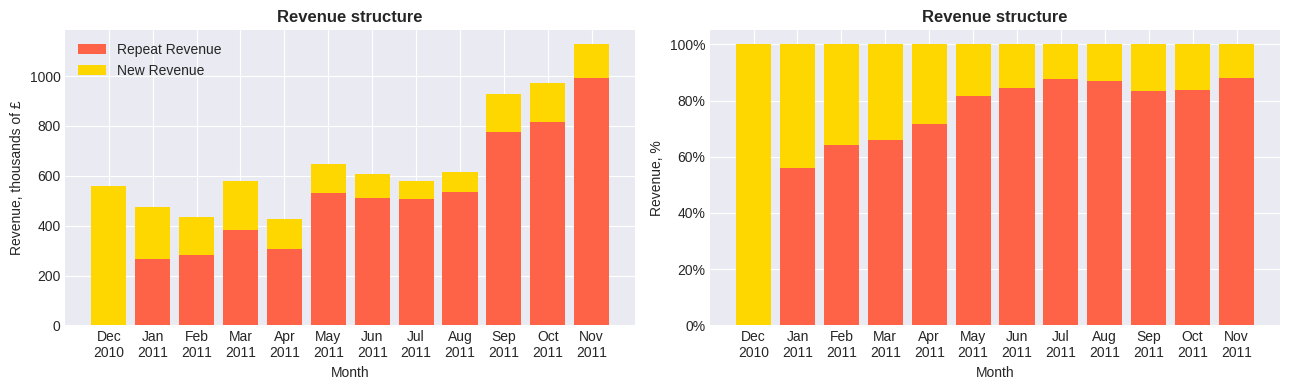

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# left chart
ax1.bar(
    x_ticks,
    height = df_rev_by_type['Repeat Revenue'],
    color='tomato',
    label='Repeat Revenue'
)
ax1.bar(
    x_ticks,
    height = df_rev_by_type['New Revenue'],
    bottom = df_rev_by_type['Repeat Revenue'],
    color='gold',
    label='New Revenue'
)
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue, thousands of £')
ax1.set_title('Revenue structure', fontweight="bold")
ax1.legend(loc='upper left')

# right chart
ax2.bar(
    x_ticks,
    height = df_rev_by_type_percentage['Repeat Revenue'],
    color='tomato'
)
ax2.bar(
    x_ticks,
    height = df_rev_by_type_percentage['New Revenue'],
    bottom = df_rev_by_type_percentage['Repeat Revenue'],
    color='gold'
)
y = np.linspace(0, 1, num=6)
ylabels = np.char.add((np.linspace(0, 100, num=6)).astype(int).astype(str), '%')
ax2.set_xlabel('Month')
ax2.set_ylabel('Revenue, %')
ax2.set_title('Revenue structure', fontweight="bold")
ax2.set_yticks(y*100, labels=ylabels)

plt.tight_layout()
plt.show()

**Conclusions from charts** \
1. We see that repeat revenue is growing almost constantly. Over 11 months it increased by 272% from £267 thousand in January to £992 thousand in November. At the same time, new revenue fell from £558 to £79 thousand from December to August, which was -85%, while in January it was already down 62% compared to December. In September, new revenue increased to 153 thousand and remained at about the same level in October and November.
2. The share of repeat revenue increased from 56% in January to 88% in November due to the fact that repeat revenue increased, while new revenue decreased or remained at the same level.

### **Repeat Revenue analysis by customers with monthly natural frequency of purchasing**

Repeat revenue analysis is essential for any company. The more repeat revenue, the more secure the company feels, knowing that customers return again and again to pay money. In this section, we will examine repeat revenue for customers with a monthly natural frequency of using our product.

In [95]:
# Function that returns a dict with cohorts as keys and a list of revenue by months for the cohort
def make_cohort_data_revenue(df):
    dict_cohort = {}
    max_month = df['MonthNumber'].max()
    for i in range(1, max_month+1):
        cohort_array = df[df.MonthCohort == i]['GMV'].to_list()
        extended_array = np.full(max_month, np.nan)
        extended_array[:len(cohort_array)] = cohort_array
        dict_cohort[i] = extended_array
    return dict_cohort

# Finding how much revenue each cohort generated for each month after the initial payment.
df_rev_ret = pd.DataFrame(df_rev[df_rev.UseCaseNF=='Monthly'].groupby(['MonthCohort','MonthNumber'])['GMV'].sum()).reset_index()

# Creating a cohort chart
cohort_months = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
cohorts_rev = pd.DataFrame(make_cohort_data_revenue(df_rev_ret), index=np.arange(12)).T
cohorts_rev.index = cohort_months
cohorts_rev.rename(columns={0:'New Revenue'}, inplace=True)

# defining the number of unique customers for each cohort
new_customers_cohort = df_rev[df_rev.UseCaseNF=='Monthly'].groupby(['MonthCohort'])['CustomerID'].nunique().to_list()
cohorts_rev.insert(loc=0, column='New Customers', value=new_customers_cohort)

We will export data to Excel for more convenient presentation and use of conditional formatting.

In [96]:
cohorts_rev.to_excel('/content/gdrive/MyDrive/Colab Notebooks/revenue_monthly_cohorts.xlsx')

As a result, we created the following table. The rows show the months of the first purchase, i.e. cohorts, by columns: new customers that have made their first purchase, new revenue generated by them and months after the first purchase. The cell contains revenue from customers from cohort M who performed made a purchase in month N. For example, in March, 212 customers made their first purchase in our online store for a total of £106692. In the third month after the month of the first purchase (June), customers from this cohort made purchases totaling £33735.

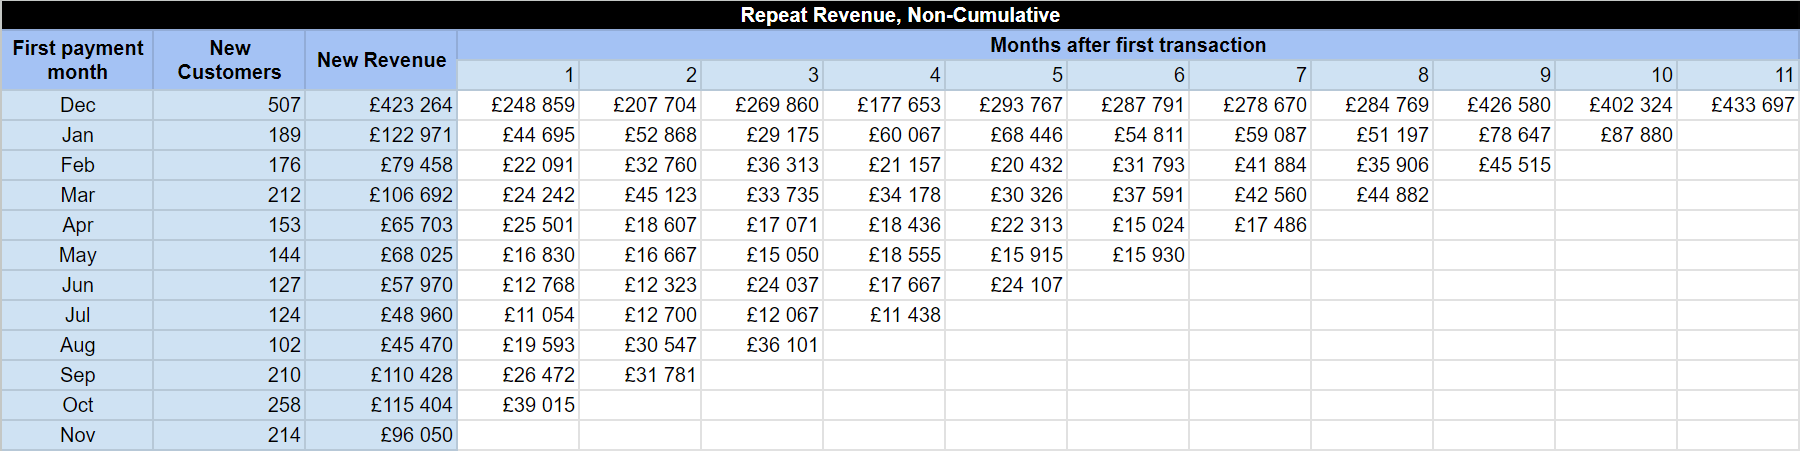

#### **Revenue Retention**

We will also create a Revenue Retention Cohort Chart. Each cell shows what % of new revenue was brought in by customers from cohort M in month N after the month of the first purchase. Thus, customers from the March cohort for the 3rd month (June) after starting to use the product brought in 32% of the revenue of the amount they paid in March. For every £1 paid by customers in March, after 3 months we will earn £0.32.

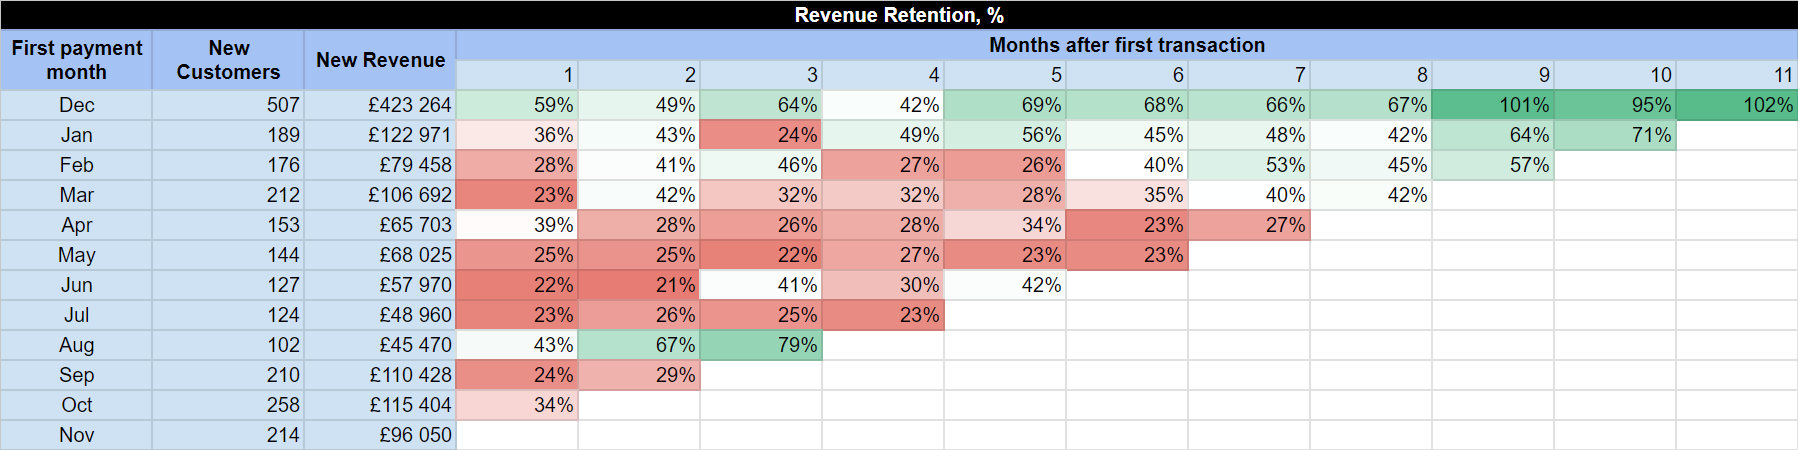

In the same way as we did when analyzing customer retention, we will plot an average retention curve to observe the change in dynamics and also evaluate how revenue retention changes from cohort to cohort.

In [97]:
# reading up above table to plot the retention curve
revenue_retention_perc = pd.read_excel(
    '/content/gdrive/MyDrive/Colab Notebooks/revenue_monthly_cohorts_edited.xlsx',
    sheet_name='Revenue Retention to_read',
    index_col='First payment month'
    )

# calculating average share
revenue_retention_perc = revenue_retention_perc.iloc[:,2:]
n_period_revenue_retention = revenue_retention_perc.mean(axis=0)

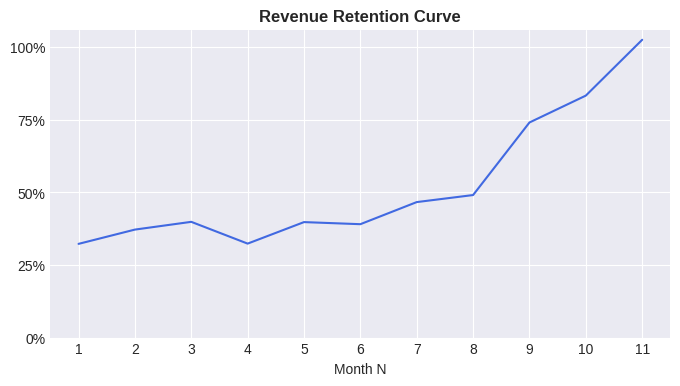

In [98]:
fig = plt.figure(figsize=(8,4))
x = np.linspace(1, 11, num=11, endpoint=True)
y = np.linspace(0, 1, num=5)
ylabels = np.char.add((np.linspace(0, 100, num=5)).astype(int).astype(str), '%')
plt.plot(x, n_period_revenue_retention, color='royalblue')
plt.title('Revenue Retention Curve', fontweight='bold')
plt.xlabel('Month N')
plt.yticks(ticks=y, labels=ylabels)
plt.xticks(ticks=x, labels=x.astype(int))

plt.show()

**Сonclusions** \
1. The revenue retention curve is increasing. This means that, on average, customers start paying more month by month from the moment of the first purchase.
2. In the first month after the first purchase, the average revenue decreases to 32% compared to what revenue the buyers brought in the month of the first purchase. For every £1 earned from the month of the first purchase, we receive an average of only £0.32.
3. By the eighth month, this value reaches £0.5.
4. 11th month Revenue Retention goes beyond 100%, and customers are willing to pay more than in the month of the first purchase. We can assume that the revenue retention rate will grow in the next months.

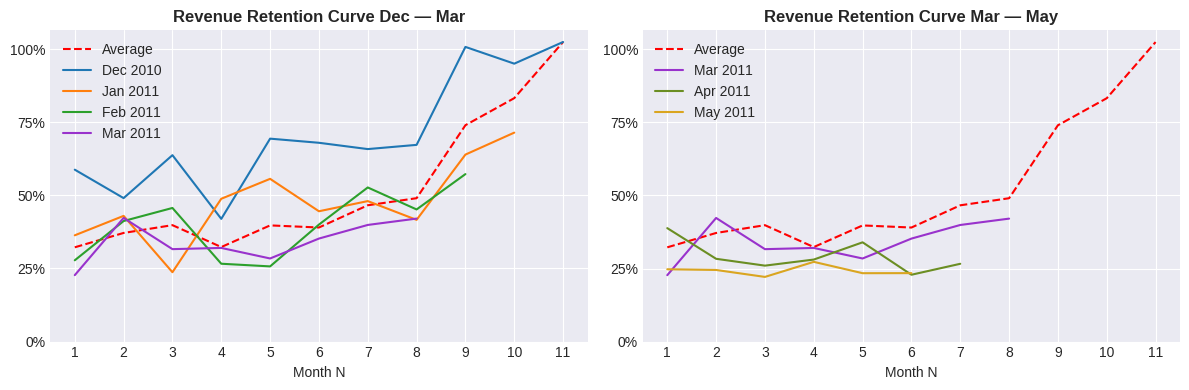

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
x = np.linspace(1, 11, num=11, endpoint=True)
y = np.linspace(0, 1, num=5)
ylabels = np.char.add((np.linspace(0, 100, num=5)).astype(int).astype(str), '%')

# left chart
ax1.plot(x, n_period_revenue_retention, linestyle='dashed', label='Average', color='r')
ax1.plot(x, revenue_retention_perc.loc['Dec',:], label='Dec 2010')
ax1.plot(x, revenue_retention_perc.loc['Jan',:], label='Jan 2011')
ax1.plot(x, revenue_retention_perc.loc['Feb',:], label='Feb 2011')
ax1.plot(x, revenue_retention_perc.loc['Mar',:], label='Mar 2011', color='darkorchid')
ax1.set_title('Revenue Retention Curve Dec — Mar', fontweight='bold')
ax1.legend()
ax1.set_xlabel('Month N')
ax1.set_yticks(ticks=y, labels=ylabels)
ax1.set_xticks(ticks=x, labels=x.astype(int))

#right chart
ax2.plot(x, n_period_revenue_retention, linestyle='dashed', label='Average', color='r')
ax2.plot(x, revenue_retention_perc.loc['Mar',:], label='Mar 2011', color='darkorchid')
ax2.plot(x, revenue_retention_perc.loc['Apr',:], label='Apr 2011', color='olivedrab')
ax2.plot(x, revenue_retention_perc.loc['May',:], label='May 2011', color='goldenrod')
ax2.set_title('Revenue Retention Curve Mar — May', fontweight='bold')
ax2.legend()
ax2.set_xlabel('Month N')
ax2.set_yticks(ticks=y, labels=ylabels)
ax2.set_xticks(ticks=x, labels=x.astype(int))

plt.tight_layout()
plt.show()

**Сonclusions** \
1. We see that the growth trend in revenue retention is observed only in the first cohorts (Dec, Jan, Feb), and the growth of the average revenue retention curve is ensured by them. The December cohort stands out as the strongest performer. Cohorts from March and next don't show an increase in revenue retention and flatten.
2. Despite the fact that revenue retention by cohorts, starting with the March cohort, does not grow, from the up above cohort chart we can see that the August cohort is very different and shows strong revenue growth in subsequent months.

#### **Average Revenue Per Customer**

An analysis of the average revenue per customer allows us answer the question of how much we earn from each attracted customer. For the analysis, we will create the cumulative cohort graph. The main difference between a non-cumulative and a cumulative chart is that in the latter, revenue from previous months is added to the total for each subsequent month. The cell in the table contains the total revenue from customers in cohort M for the month N.

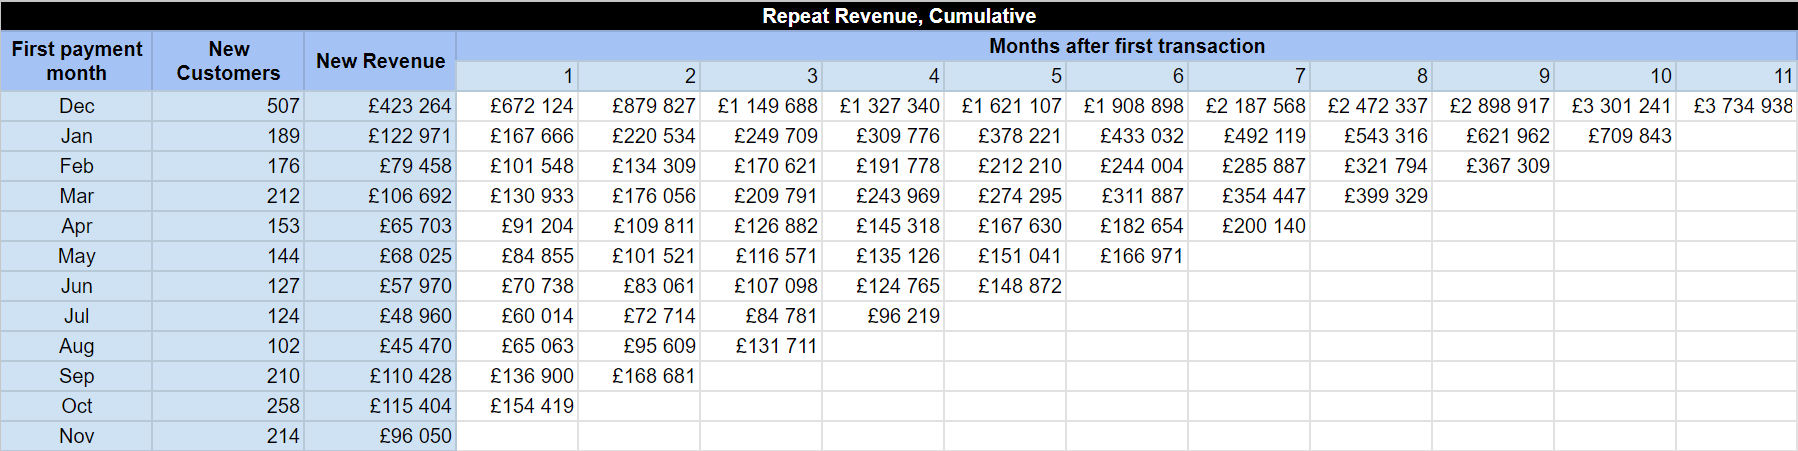

Using this chart, we can calculate the ARPC by dividing the revenue in each cell by the number of attracted customers in this cohort.

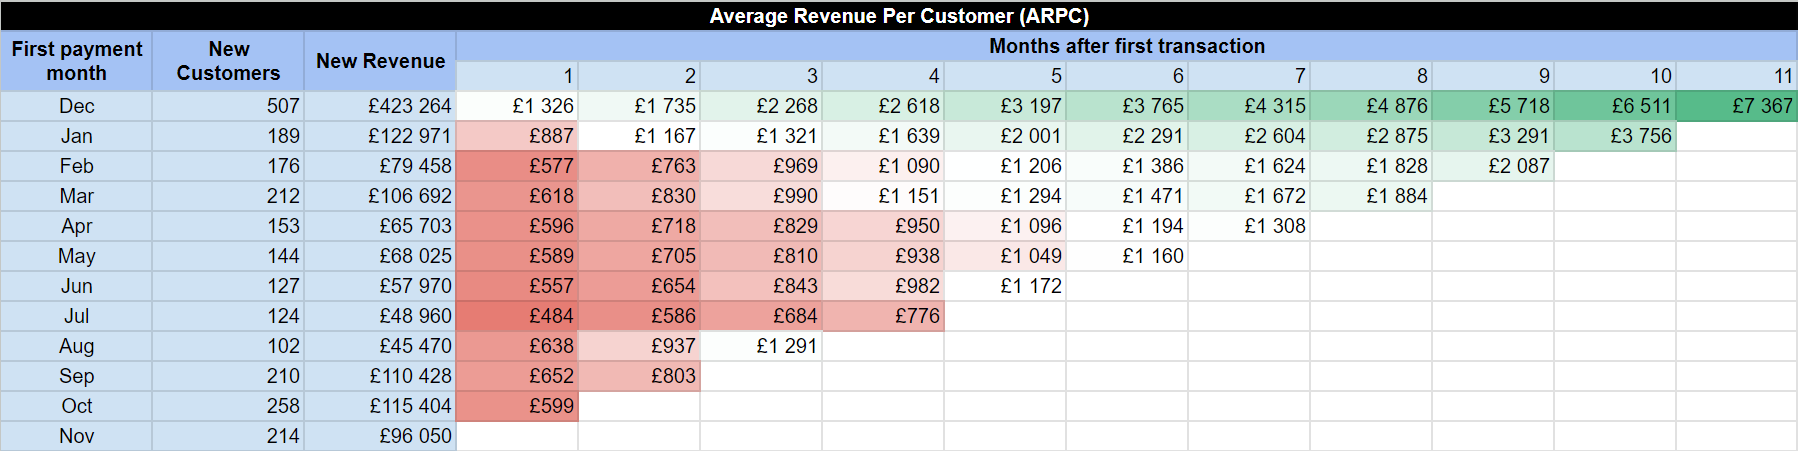

We will plot an Average ARPC curve by cohorts in comparison with ARPC curves.

In [100]:
# reading up above table to plot the retention curve
df_ARPC = pd.read_excel(
    '/content/gdrive/MyDrive/Colab Notebooks/revenue_monthly_cohorts_edited.xlsx',
    sheet_name='ARPC to_read',
    index_col='First payment month'
    )

# calculating average share
df_ARPC = df_ARPC.iloc[:,2:]
ARPC_period = df_ARPC.mean(axis=0)

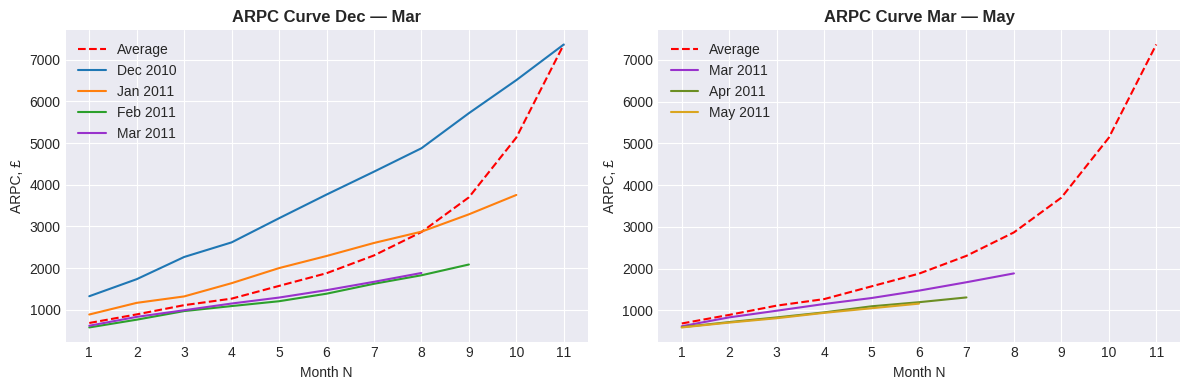

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
x = np.linspace(1, 11, num=11, endpoint=True)
y = np.linspace(0, 1, num=5)
ylabels = np.char.add((np.linspace(0, 100, num=5)).astype(int).astype(str), '%')

# left chart
ax1.plot(x, ARPC_period, linestyle='dashed', label='Average', color='r')
ax1.plot(x, df_ARPC.loc['Dec',:], label='Dec 2010')
ax1.plot(x, df_ARPC.loc['Jan',:], label='Jan 2011')
ax1.plot(x, df_ARPC.loc['Feb',:], label='Feb 2011')
ax1.plot(x, df_ARPC.loc['Mar',:], label='Mar 2011', color='darkorchid')
ax1.set_title('ARPC Curve Dec — Mar', fontweight='bold')
ax1.legend()
ax1.set_xlabel('Month N')
ax1.set_ylabel('ARPC, £')
ax1.set_xticks(ticks=x, labels=x.astype(int))

#right chart
ax2.plot(x, ARPC_period, linestyle='dashed', label='Average', color='r')
ax2.plot(x, df_ARPC.loc['Mar',:], label='Mar 2011', color='darkorchid')
ax2.plot(x, df_ARPC.loc['Apr',:], label='Apr 2011', color='olivedrab')
ax2.plot(x, df_ARPC.loc['May',:], label='May 2011', color='goldenrod')
ax2.set_title('ARPC Curve Mar — May', fontweight='bold')
ax2.legend()
ax2.set_xlabel('Month N')
ax2.set_ylabel('ARPC, £')
ax2.set_xticks(ticks=x, labels=x.astype(int))

plt.tight_layout()
plt.show()

**Сonclusions** \

1. Averaged ARPC curve is an exponential function. This happens because there is stronger growth in the first cohorts. When calculating the average ARPC, for example, for the 11th month, only the value of the December cohort is used, in which ARPC is clearly growing stronger than in other cohorts.
2. For all the cohorts under consideration, the average revenue per customer grows linearly, but the growth rate decreases from cohort to cohort.

### **Repeat Revenue analysis by customers with quarterly natural frequency of purchasing**

Let's analyze Repeat Revenue by customers with quarterly natural frequency of purchasing.

In [102]:
# Function that returns a dict with cohorts as keys and a list of revenue by quarters for the cohort
def make_cohort_data_revenue_q(df):
    dict_cohort = {}
    max_quarter = df['QuarterNumber'].max()
    for i in range(1, max_quarter+1):
        cohort_array = df[df.QuarterCohort == i]['GMV'].to_list()
        extended_array = np.full(max_quarter, np.nan)
        extended_array[:len(cohort_array)] = cohort_array
        dict_cohort[i] = extended_array
    return dict_cohort

# splitting by quarter cohorts
df_rev['QuarterNumber'] = (df_rev['MonthNumber']-1) // 3 + 1
df_rev['QuarterCohort'] = (df_rev['MonthCohort']-1) // 3 + 1
df_rev[df_rev.UseCaseNF=='Quarterly'].sample(5)

# Finding how much revenue each cohort generated for each quarter after the initial payment
df_rev_ret_q = pd.DataFrame(df_rev[df_rev.UseCaseNF=='Quarterly'].groupby(['QuarterCohort','QuarterNumber'])['GMV'].sum()).reset_index()

# Creating a cohort chart
cohort_quarters = [1, 2, 3, 4]
cohorts_rev_q = pd.DataFrame(make_cohort_data_revenue_q(df_rev_ret_q), index=np.arange(4)).T
cohorts_rev_q.index = cohort_quarters
cohorts_rev_q.rename(columns={0:'New Revenue'}, inplace=True)

# defining the number of unique customers for each cohort
new_customers_cohort_q = df_rev[df_rev.UseCaseNF=='Quarterly'].groupby(['QuarterCohort'])['CustomerID'].nunique().to_list()
cohorts_rev_q.insert(loc=0, column='New Customers', value=new_customers_cohort_q)

We will export data to Excel for more convenient presentation and use of conditional formatting.

In [103]:
cohorts_rev_q.to_excel('/content/gdrive/MyDrive/Colab Notebooks/revenue_quarterly_cohorts.xlsx')

As a result, we created the following table.

<img src="https://drive.google.com/uc?export=view&id=1K-w9CH97JtyYkwVomD3w2tbgUCauq98X" width="500">

#### **Revenue Retention**

We will also create a Revenue Retention Cohort Chart. Each cell shows what % of new revenue was brought in by customers from cohort M in quarter N after the quarter of the first purchase. Thus, customers from the Q2 cohort for the 2nd quarter (Jun&mdash;Aug) after starting to use the product brought in 70% of the revenue of the amount they paid in Q2. For every £1 paid by customers in March, after 3 months we will earn £0.7.

<img src="https://drive.google.com/uc?export=view&id=1lGvguYwJW36vZEHQgVEzMsjiv7vCdccP" width="500">


Next, we will plot an average retention curve to observe the change in dynamics.

In [104]:
# reading up above table to plot the retention curve
revenue_retention_perc_q = pd.read_excel(
    '/content/gdrive/MyDrive/Colab Notebooks/revenue_quarterly_cohorts_edited.xlsx',
    sheet_name='Revenue Retention to_read',
    index_col='First payment quarter'
    )

# calculating average share
revenue_retention_perc_q = revenue_retention_perc_q.iloc[:,2:]
n_period_revenue_retention_q = revenue_retention_perc_q.mean(axis=0)

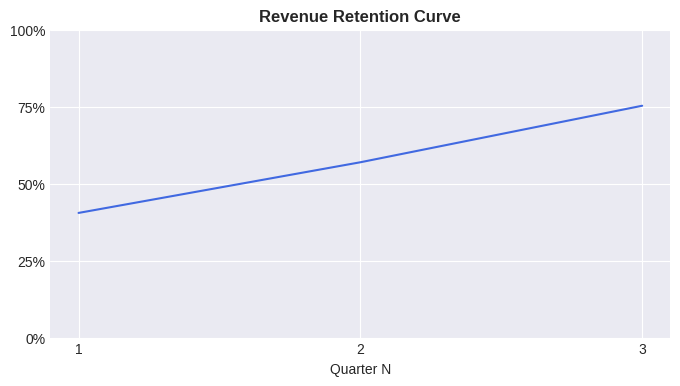

In [105]:
fig = plt.figure(figsize=(8,4))
x = np.linspace(1, 3, num=3, endpoint=True)
y = np.linspace(0, 1, num=5)
ylabels = np.char.add((np.linspace(0, 100, num=5)).astype(int).astype(str), '%')
plt.plot(x, n_period_revenue_retention_q, color='royalblue')
plt.title('Revenue Retention Curve', fontweight='bold')
plt.xlabel('Quarter N')
plt.yticks(ticks=y, labels=ylabels)
plt.xticks(ticks=x, labels=x.astype(int))

plt.show()

**Conclusions** \
1. The revenue retention curve is increasing approximately linearly. This means that, on average, customers start paying more quarter by quarter from the moment of the first purchase.
2. In the first quarter after the first purchase, the average revenue decreases to 40% compared to what revenue the buyers brought in the quarter of the first purchase. For every £1 earned from the quarter of the first purchase, we receive an average of only £0.4. For the 2nd quarter this value grows up to £0.56, and for the 3rd quarter it grows up to £0.75.
3. Since there is a linear growth, we can expect that at the time of Q5, revenue retention will exceed 100%

There is no need to plot revenue retention curves by cohorts, because the dimension of the cohort table is small, and we can easily draw conclusions by looking at it. Let's duplicate it here for convenience.

<img src="https://drive.google.com/uc?export=view&id=1lGvguYwJW36vZEHQgVEzMsjiv7vCdccP" width="500">


**Conclusions** \
1. We see that the revenue retention in the first quarter decreased for buyers from the Q2 cohort to 29%, but for buyers from the Q3 cohort, there was a significant increase, and the retention increased to 56%.
2. The revenue retention value is colored green diagonally for all cohorts. This means that Q4 saw strong revenue growth across all cohorts.

#### **Average Revenue Per Customer**

As we did earlier for customers with a monthly natural frequency, we will do a similar analysis for customers with a quarterly frequency. Let'c creat the cohort chart for cumulative revenue.

<img src="https://drive.google.com/uc?export=view&id=1IU7JOPRjl27sl93Q_zB8jxHgevj9Vk9I" width="500">


Also, we will calculate ARPC.

<img src="https://drive.google.com/uc?export=view&id=10cSPGj-2hA5YrjMqPLDHJ-kdFGexdNTY" width="500">


Let's plot an Average ARPC curve by cohorts.

In [106]:
# reading up above table to plot the retention curve
df_ARPC_q = pd.read_excel(
    '/content/gdrive/MyDrive/Colab Notebooks/revenue_quarterly_cohorts_edited.xlsx',
    sheet_name='ARPC to_read',
    index_col='First payment quarter'
    )

# calculating average share
df_ARPC_q = df_ARPC_q.iloc[:,2:]
ARPC_period_q = df_ARPC_q.mean(axis=0)

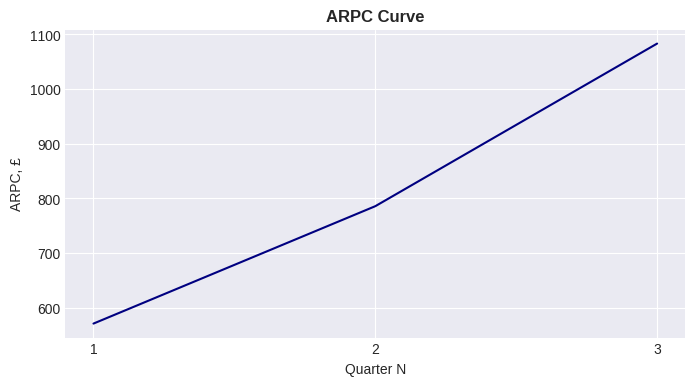

In [107]:
fig = plt.figure(figsize=(8,4))
x = np.linspace(1, 3, num=3, endpoint=True)
ylabels = np.char.add((np.linspace(0, 100, num=5)).astype(int).astype(str), '%')
plt.plot(x, ARPC_period_q, color='navy')
plt.title('ARPC Curve', fontweight='bold')
plt.xlabel('Quarter N')
plt.xticks(ticks=x, labels=x.astype(int))
plt.ylabel('ARPC, £')

plt.show()

**Сonclusions from the curve and cohort chart** \

1. The ARPC curve is growing, so customers continue to generate revenue with each new quarter. By the 2nd quarter ARPC increased by £200 compared to the 1st, and by £300 by the 3d quarter comparing to the 2nd.
2. Customers from the Q2 cohort have the lowest ARPC at the time of the first quarter after the first purchase, but by the second quarter their ARPC exceeds the ARPC of the Q1 cohort.

---
# **Conclusions**

Since our data only contains information about customers, we will assume that "user"="customer". Therefore, a user is considered active if he has made a purchase, so the Core Action is "make a purchase".

There are two cases of natural frequency of using the product. According the first case, customers purchase goods monthly, the second case &mdash; quarterly.

**Conclusions from the customer retention analysis**
- Customers with monthly natural frequency of purchasing
  1. The global Monthly Active Users (MAU) trend shows an increase. At the same time, the number of dormant users is also growing.
  2. Each month, the number of active users exceeds the number of dormant users that month, but approximately, the number of engaged (retained from previous periods) users is equal to the number of dormant for each month.
  3. In December 2010, the largest number of activated users was recorded. After that, this number started to decline. However, in September, the number increased by approximately half compared to August and remained stable.
  4. In Jan, Apr, Jun, Aug 2011 fewer users came to the product than left. In Mar, May, Sep 2011 >1.6 times more users joined the product than left. On average, 1.2 times more users come to the product than leave.
  5. The retention curve is shaped like a smile. This means that over time, more and more people begin to return to the product. The curve reaches a plateau with the Retention Rate 34% and Time-To-Habit of 1 month. This means that on average, 34% of users find value in using a product and develop a habit of using it one month after the first purchase.
  6. The retention of users of the December cohort is clearly better than that of other cohorts.
  7. After a month from the first purchasing month, retention decreases from cohort to cohort and then stabilizes around the average value. In the part of the curves where they reach a plateau, the shiftings are preserved. However, retention continues to dicrease for the April and May cohorts and flattens only at month 5-6.
  8. Despite the fact that N-period Retention falls from cohort to cohort, in each cohort the curve flattens out and doesn't go to 0. Moreover, in earlier cohorts an increase in the number of active users is visible, starting from about 8th month.
  9. In October, there was a drop in the number of active users in the cohorts from February to July.
  10. For the June cohort, we see a significant increase in the number of active users in month 3, compared to neighboring cohorts.

- Customers with quarterly natural frequency of purchasing
  1. In the first three quarters, the number of active users is about the same. In Q4 (Sep 2011 &mdash; Nov 2011), Quarterly Active Users (QAU) increased while the number of dormant users decreased significantly.
  2. Each quarter, the number of active users exceeds the number of dormant users that month, but in Q2 and Q3, the number of dormant users is higher than the number of engaged (retained from previous periods) users, however in the Q4 the situation is changing in the opposite direction.
  3. In the period from December 2010 to February 2011, the largest number of activated users was recorded. After that, this number started to decline. However, in the fourth quarter, the number slightly increased.
  4. In Q3 (Jun 2011 &mdash; Aug 2011) fewer users came to the product than left. In Q2 and Q4 more users joined the product than left, moreover, in Q4, the number of users who came was 2.4 times higher than those who left. On average, 1.4 times more users come to the product than leave.
  5. We see that the retention curve is shaped like a smile. This means that over time, more and more people begin to return to the product. The curve reaches a minimum in the first quarter and First Quarter Retention is 39% vs 34% of the First Month Retention for users with monthly natural frequency. This means that on average, 39% of users find value in using a product and develop a habit of using it. Therefore for our product Time-To-Habit is 1 quarter and the Retention Rate equals to 39%.
  6. At the time of the first quarter after the first purchase, we see that users from the Q3 cohort are retained best, and those from the Q2 cohort are the worst retained. That is, a small number of users from the Q2 cohort made a purchase again 1 quarter after the first purchase, but in the next cohort Q3, the share of those who returned in the first quarter increased, the user experience was improved.
  7. The share of active users in the Q2 cohort increased significantly by 27% in the second quarter compared to the first quarter after the first purchase. This indicates that a significant number of users who had not made a purchase in the previous quarter returned to the product in the next quarter.
  8. None of the curves go to 0, which means that the product continues to benefit users and they continue to make purchases. At the same time, users who were inactive in previous periods are beginning to return to the product.
  9. In the third quarter (Jun-Aug), there was a significant decline in the number of retained users (by about 8% relative to the average for all quarters), but in the fourth quarter (Sep-Nov), their number increased significantly.

**Conclusions from the revenue analysis**
- General analysis
  1. The total revenue for the 1-year period from December 2010 to November 2011 was £7.95M. Out of this, 80% was generated from sales to customers who purchase goods on a monthly basis, while 20% came from customers who make quarterly purchases.
  2. From December 2010 to April 2011, revenue is decreasing from 557 to 425 thousand pounds, but revenue in March stands out against the background of the fall. In May, revenue increased to 647 thousand pounds and remained at approximately the same level until August inclusive. Then, revenue growth begins strongly in September and reaches £1.125M in November.
  3. Our revenue has grown significantly over the past 12 months. This has been due to an increase in the number of customers by 93% from 885 to 1711 over the year, while the average revenue per customer (ARPC) per month has remained relatively stable at around £600.
  4. From December 2010 to August 2011, there is an increase in the number of customers with a monthly natural frequency of using the product from 507 to 707 unique customers, while there is no increase in the number of customers with a quarterly frequency. In December, the ratio of the number of customers with a monthly frequency to the number of customers with a quarterly frequency is 57/42, and in August it is 72/27. From September to November, growth was observed in both segments.
  5. The percentage of customers with a monthly frequency to customers with a quarterly frequency hovers around 65%. Despite this, about 80% of revenue comes from customers who make orders with monthly frequency. This is because they place more orders per month, so ARPC for customers with a monthly natural frequency is greater than ARPC for customers with a quarterly one.

- Repeat Revenue analysis by customers with monthly natural frequency of purchasing
  1. The revenue retention curve is increasing. This means that, on average, customers start paying more month by month from the moment of the first purchase.
  2. In the first month after the first purchase, the average revenue decreases to 32% compared to what revenue the buyers brought in the month of the first purchase. For every £1 earned from the month of the first purchase, we receive an average of only £0.32. Then, by the eighth month, this value reaches £0.5.
  4. 11th month Revenue Retention goes beyond 100%, and customers are willing to pay more than in the month of the first purchase. We can assume that the revenue retention rate will grow in the next months, but the growth trend in revenue retention is observed only in the first cohorts (Dec, Jan, Feb), and the growth of the average revenue retention curve is ensured by them. The December cohort stands out as the strongest performer. Cohorts from March and next don't show an increase in revenue retention and flatten.
  5. Despite the fact that revenue retention by cohorts, starting with the March cohort, does not grow, the August cohort is very different and shows strong revenue growth in subsequent months.
  6. ARPC is growing exponentially. This happens because there is stronger growth in the first cohorts, especially in the December cohort.
  7. For all the cohorts under consideration, the average revenue per customer grows linearly, but the growth rate decreases from cohort to cohort.

- Repeat Revenue analysis by customers with quarterly natural frequency of purchasing
  1. The revenue retention curve is increasing approximately linearly. This means that, on average, customers start paying more quarter by quarter from the moment of the first purchase.
  2. In the first quarter after the first purchase, the average revenue decreases to 40% compared to what revenue the buyers brought in the quarter of the first purchase. For every £1 earned from the quarter of the first purchase, we receive an average of only £0.4. For the 2nd quarter this value grows up to £0.56, and for the 3rd quarter it grows up to £0.75.
  3. Since there is a linear growth, we can expect that at the time of Q5, revenue retention will exceed 100%.
  4. The revenue retention in the first quarter decreased for buyers from the Q2 cohort to 29%, but for buyers from the Q3 cohort, there was a significant increase, and the retention increased to 56%.
  5. In the Q4, there was a strong revenue growth across all cohorts.
  6. The ARPC curve is growing, so customers continue to generate revenue with each new quarter. By the 2nd quarter ARPC increased by £200 compared to the 1st, and by £300 by the 3d quarter comparing to the 2nd.
  7. Customers from the Q2 cohort have the lowest ARPC at the time of the first quarter after the first purchase, but by the second quarter their ARPC exceeds the ARPC of the Q1 cohort.

